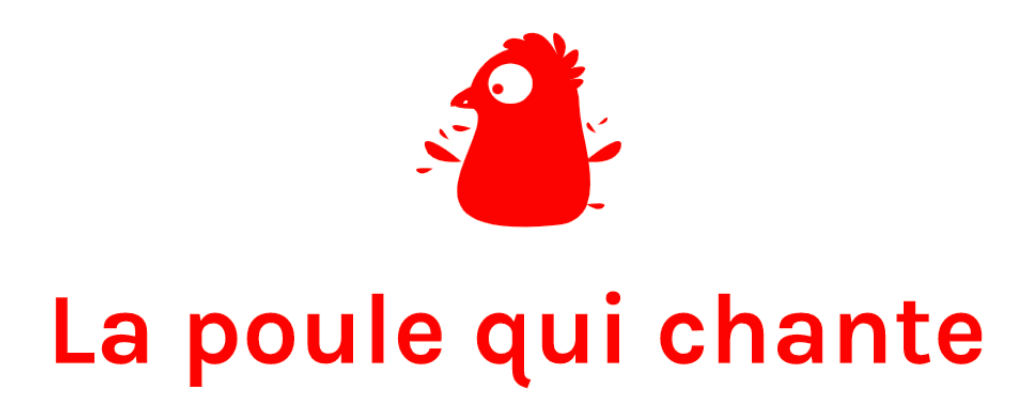

### Table des matières :

* [1 - Libriairies et modules](#chap1)
* [2 - Importation des données](#chap2)
* [3 - Analyse en Composantes Principales - ACP](#chap3)
    * [3.1 - Centrer-Réduire](#chap3.1)
    * [3.2 - Initialisation](#chap3.2)
    * [3.3 - Analyse des composantes](#chap3.3)
* [4 - Classification Ascendante Hierarchique - CAH](#chap4)
* [5 - K-meamns et clustering](#chap5)
    * [5.1 - Nombres de clusters](#chap5.1)
        * [5.1.1 - Méthode du coude](#chap5.1.1)
        * [5.1.2 - Silhouette Score](#chap5.1.2)
        * [5.1.3 - Indice Davies-Bouldin](#chap5.1.3)
    * [5.2 - K-means clustering sur 4, 5 et 6 clusters](#Chap5.2)
    * [5.3 - Analyse des centroids](#chap5.3)
    * [5.4 - Inertie totale des pays dans chaque cluster](#chap5.4)

# 1 - Librairies et modules : <a class="anchor" id="chap1"></a>

In [1]:
# Librairies et fonctions :
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler
import math

# maximise dataframe display
pd.set_option('display.max_colwidth', None)

# 2 - Importation des données : <a class="anchor" id="chap2"></a>

In [2]:
# Importation et séparation des fichiers :
data = pd.read_csv('data_final.csv',index_col=0)
x = data.values
countries = data.index
features = data.columns

# 3 - Analyse en Composantes Principales - ACP : <a class="anchor" id="chap3"></a>

### 3.1 - Centrer-Réduire : <a class="anchor" id="chap3.1"></a>

In [3]:
#La distribution des variables :
data

urban_pop_%  gdp_growth_%  gdp_per_cap_US$  trade_%_gdp  \
country                                                               
Albania        0.637411     -1.752778      5278.222282    60.969921   
Algeria        0.735321    -15.147118      3354.153164    45.841991   
Angola         0.656235    -29.625968      1750.204252    66.907478   
Argentina      0.930807    -13.894724      8560.709940    30.148142   
Armenia        0.663155     -7.177995      4505.867744    69.490997   
...                 ...           ...              ...          ...   
Uruguay        0.973341    -12.526994     15619.545754    46.368309   
Uzbekistan     0.499791     -0.022316      1786.468211    61.992371   
Viet Nam       0.380008      3.526712      2805.609177   208.254074   
Zambia         0.440432    -22.306490       956.831748    79.325485   
Zimbabwe       0.363790     -4.115044      1382.591426    76.001938   

            net_imports_poultry_US$  safety_stability_index  \
country                                                       
Albania                  30260000.0                    0.08   
Algeria                  26264000.0                   -0.86   
Angola                  196303000.0                   -0.52   
Argentina              -223375000.0                    0.04   
Armenia                  33339000.0                   -0.57   
...                             ...                     ...   
Uruguay                   8034000.0                    1.05   
Uzbekistan               28770000.0                   -0.44   
Viet Nam                286086000.0                   -0.07   
Zambia                    7707000.0                   -0.13   
Zimbabwe                  2916000.0                   -1.08   

            poultry_consumption_kg_per_cap  total_protein_g_cap_day  \
country                                                               
Albania                          14.282360                   109.98   
Algeria                           5.976779                    88.32   
Angola                            8.065121                    43.94   
Argentina                        45.363719                   112.37   
Armenia                          16.297362                    97.62   
...                                    ...                      ...   
Uruguay                          22.136820                    86.81   
Uzbekistan                        2.725846                   103.21   
Viet Nam                         14.101407                    76.91   
Zambia                            2.566203                    50.85   
Zimbabwe                          4.371453                    54.93   

            animal_protein_g_cap_day  poultry_protein_g_cap_day  \
country                                                           
Albania                    59.114933                       5.58   
Algeria                    24.795826                       1.75   
Angola                     12.004645                       2.77   
Argentina                  68.492070                      14.38   
Armenia                    48.531650                       5.30   
...                              ...                        ...   
Uruguay                    50.407818                       7.06   
Uzbekistan                 46.999310                       0.93   
Viet Nam                   36.982117                       4.72   
Zambia                     12.315729                       0.89   
Zimbabwe                   23.380909                       1.55   

            obesity_deaths_%  
country                       
Albania                12.87  
Algeria                17.06  
Angola                  5.22  
Argentina              10.38  
Armenia                15.37  
...                      ...  
Uruguay                 9.52  
Uzbekistan             16.66  
Viet Nam                5.53  
Zambia                  6.80  
Zimbabwe                6.43  

[125 rows x 11 columns]

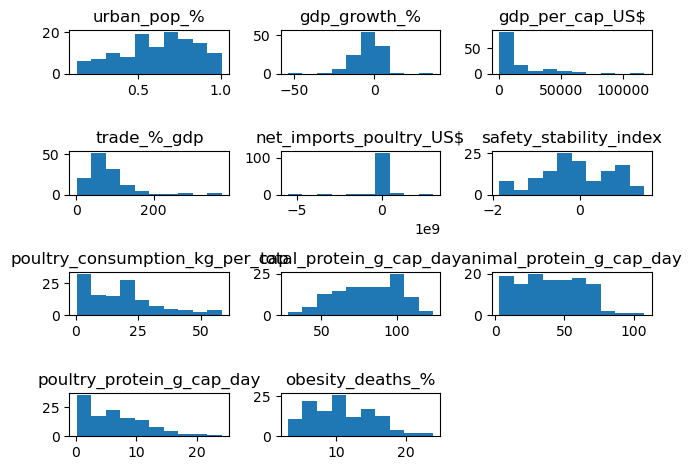

In [4]:
plt.subplot(4, 3, 1)
plt.hist(data['urban_pop_%'])
plt.title('urban_pop_%')

plt.subplot(4, 3, 2)
plt.hist(data['gdp_growth_%'])
plt.title('gdp_growth_%')

plt.subplot(4, 3, 3)
plt.hist(data['gdp_per_cap_US$'])
plt.title('gdp_per_cap_US$')

plt.subplot(4, 3, 4)
plt.hist(data['trade_%_gdp'])
plt.title('trade_%_gdp')

plt.subplot(4, 3, 5)
plt.hist(data['net_imports_poultry_US$'])
plt.title('net_imports_poultry_US$')

plt.subplot(4, 3, 6)
plt.hist(data['safety_stability_index'])
plt.title('safety_stability_index')

plt.subplot(4, 3, 7)
plt.hist(data['poultry_consumption_kg_per_cap'])
plt.title('poultry_consumption_kg_per_cap')

plt.subplot(4, 3, 8)
plt.hist(data['total_protein_g_cap_day'])
plt.title('total_protein_g_cap_day')

plt.subplot(4, 3, 9)
plt.hist(data['animal_protein_g_cap_day'])
plt.title('animal_protein_g_cap_day')

plt.subplot(4, 3, 10)
plt.hist(data['poultry_protein_g_cap_day'])
plt.title('poultry_protein_g_cap_day')

plt.subplot(4, 3, 11)
plt.hist(data['obesity_deaths_%'])
plt.title('obesity_deaths_%')

plt.tight_layout()
plt.show()

In [5]:
#Standard Scaler :
x1 = data.copy()
std_scaler = StandardScaler()
std_scaler.fit(x1)
x_scaled1 = std_scaler.transform(x1)
x_scaled1 = pd.DataFrame(x_scaled1)
x_scaled1 = x_scaled1.rename(columns={0:'urban_pop_%',
                                    1:'gdp_growth_%', 
                                    2:'gdp_per_cap_US$',
                                    3:'trade_%_gdp',
                                    4:'net_imports_poultry_US$',
                                    5:'safety_stability_index',
                                    6:'poultry_consumption_kg_per_cap',
                                    7:'total_protein_g_cap_day',
                                    8:'animal_protein_g_cap_day',
                                    9:'poultry_protein_g_cap_day',
                                    10:'obesity_deaths_%'})


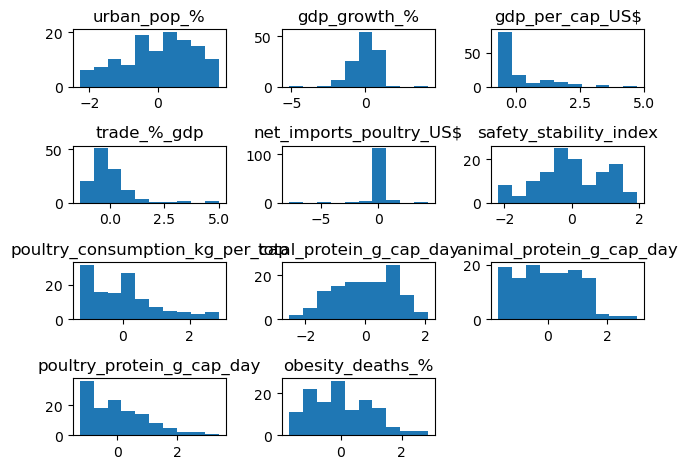

In [6]:
#Distribution après Scaler :
plt.subplot(4, 3, 1)
plt.hist(x_scaled1['urban_pop_%'])
plt.title('urban_pop_%')

plt.subplot(4, 3, 2)
plt.hist(x_scaled1['gdp_growth_%'])
plt.title('gdp_growth_%')

plt.subplot(4, 3, 3)
plt.hist(x_scaled1['gdp_per_cap_US$'])
plt.title('gdp_per_cap_US$')

plt.subplot(4, 3, 4)
plt.hist(x_scaled1['trade_%_gdp'])
plt.title('trade_%_gdp')

plt.subplot(4, 3, 5)
plt.hist(x_scaled1['net_imports_poultry_US$'])
plt.title('net_imports_poultry_US$')

plt.subplot(4, 3, 6)
plt.hist(x_scaled1['safety_stability_index'])
plt.title('safety_stability_index')

plt.subplot(4, 3, 7)
plt.hist(x_scaled1['poultry_consumption_kg_per_cap'])
plt.title('poultry_consumption_kg_per_cap')

plt.subplot(4, 3, 8)
plt.hist(x_scaled1['total_protein_g_cap_day'])
plt.title('total_protein_g_cap_day')

plt.subplot(4, 3, 9)
plt.hist(x_scaled1['animal_protein_g_cap_day'])
plt.title('animal_protein_g_cap_day')

plt.subplot(4, 3, 10)
plt.hist(x_scaled1['poultry_protein_g_cap_day'])
plt.title('poultry_protein_g_cap_day')

plt.subplot(4, 3, 11)
plt.hist(x_scaled1['obesity_deaths_%'])
plt.title('obesity_deaths_%')

plt.tight_layout()
plt.show()

In [7]:
data_log=data.copy()
data_log['urban_pop_%']=np.log(data_log['urban_pop_%'])
#Valeurs négatives, non-utilisables pour le logarithme
#data_log['gdp_growth_%']=np.log(data_log['gdp_growth_%'])
data_log['gdp_per_cap_US$']=np.log(data_log['gdp_per_cap_US$'])
data_log['trade_%_gdp']=np.log(data_log['trade_%_gdp'])
#Valeurs négatives, non-utilisables pour le logarithme
#data_log['net_imports_poultry_US$']=np.log(data_log['net_imports_poultry_US$'])
#Valeurs négatives, non-utilisables pour le logarithme
#data_log['safety_stability_index']=np.log(data_log['safety_stability_index'])
data_log['poultry_consumption_kg_per_cap']=np.log(data_log['poultry_consumption_kg_per_cap'])
data_log['total_protein_g_cap_day']=np.log(data_log['total_protein_g_cap_day'])
data_log['animal_protein_g_cap_day']=np.log(data_log['animal_protein_g_cap_day'])
data_log['poultry_protein_g_cap_day']=np.log(data_log['poultry_protein_g_cap_day'])
data_log['obesity_deaths_%']=np.log(data_log['obesity_deaths_%'])
data_log

urban_pop_%  gdp_growth_%  gdp_per_cap_US$  trade_%_gdp  \
country                                                               
Albania       -0.450340     -1.752778         8.571345     4.110381   
Algeria       -0.307449    -15.147118         8.117955     3.825201   
Angola        -0.421236    -29.625968         7.467488     4.203311   
Argentina     -0.071703    -13.894724         9.054938     3.406123   
Armenia       -0.410746     -7.177995         8.413136     4.241197   
...                 ...           ...              ...          ...   
Uruguay       -0.027020    -12.526994         9.656278     3.836616   
Uzbekistan    -0.693565     -0.022316         7.487996     4.127011   
Viet Nam      -0.967564      3.526712         7.939376     5.338759   
Zambia        -0.819998    -22.306490         6.863628     4.373559   
Zimbabwe      -1.011180     -4.115044         7.231715     4.330759   

            net_imports_poultry_US$  safety_stability_index  \
country                                                       
Albania                  30260000.0                    0.08   
Algeria                  26264000.0                   -0.86   
Angola                  196303000.0                   -0.52   
Argentina              -223375000.0                    0.04   
Armenia                  33339000.0                   -0.57   
...                             ...                     ...   
Uruguay                   8034000.0                    1.05   
Uzbekistan               28770000.0                   -0.44   
Viet Nam                286086000.0                   -0.07   
Zambia                    7707000.0                   -0.13   
Zimbabwe                  2916000.0                   -1.08   

            poultry_consumption_kg_per_cap  total_protein_g_cap_day  \
country                                                               
Albania                           2.659025                 4.700299   
Algeria                           1.787882                 4.480967   
Angola                            2.087549                 3.782825   
Argentina                         3.814713                 4.721797   
Armenia                           2.791003                 4.581082   
...                                    ...                      ...   
Uruguay                           3.097242                 4.463722   
Uzbekistan                        1.002779                 4.636766   
Viet Nam                          2.646275                 4.342636   
Zambia                            0.942427                 3.928880   
Zimbabwe                          1.475095                 4.006060   

            animal_protein_g_cap_day  poultry_protein_g_cap_day  \
country                                                           
Albania                     4.079484                   1.719189   
Algeria                     3.210675                   0.559616   
Angola                      2.485294                   1.018847   
Argentina                   4.226718                   2.665838   
Armenia                     3.882216                   1.667707   
...                              ...                        ...   
Uruguay                     3.920146                   1.954445   
Uzbekistan                  3.850133                  -0.072571   
Viet Nam                    3.610434                   1.551809   
Zambia                      2.510877                  -0.116534   
Zimbabwe                    3.151920                   0.438255   

            obesity_deaths_%  
country                       
Albania             2.554899  
Algeria             2.836737  
Angola              1.652497  
Argentina           2.339881  
Armenia             2.732418  
...                      ...  
Uruguay             2.253395  
Uzbekistan          2.813011  
Viet Nam            1.710188  
Zambia              1.916923  
Zimbabwe            1.860975  

[125 rows x 11 columns]

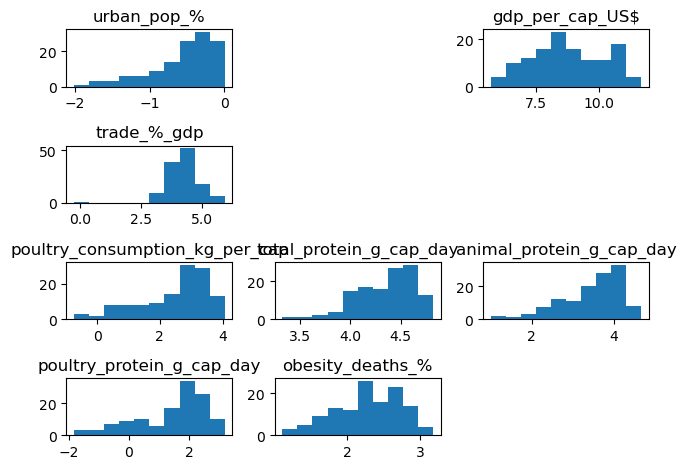

In [8]:
#Distribution du log :
plt.subplot(4, 3, 1)
plt.hist(data_log['urban_pop_%'])
plt.title('urban_pop_%')

plt.subplot(4, 3, 3)
plt.hist(data_log['gdp_per_cap_US$'])
plt.title('gdp_per_cap_US$')

plt.subplot(4, 3, 4)
plt.hist(data_log['trade_%_gdp'])
plt.title('trade_%_gdp')

plt.subplot(4, 3, 7)
plt.hist(data_log['poultry_consumption_kg_per_cap'])
plt.title('poultry_consumption_kg_per_cap')

plt.subplot(4, 3, 8)
plt.hist(data_log['total_protein_g_cap_day'])
plt.title('total_protein_g_cap_day')

plt.subplot(4, 3, 9)
plt.hist(data_log['animal_protein_g_cap_day'])
plt.title('animal_protein_g_cap_day')

plt.subplot(4, 3, 10)
plt.hist(data_log['poultry_protein_g_cap_day'])
plt.title('poultry_protein_g_cap_day')

plt.subplot(4, 3, 11)
plt.hist(data_log['obesity_deaths_%'])
plt.title('obesity_deaths_%')

plt.tight_layout()
plt.show()

Après examen de la distribution des données, on sélectionne les données logarithmiques pour le dataset final, auquel on ajoute les données non-transformables en logarithme, puis on remet l'ensemble sur la même échelle avec un scaler.

In [9]:
data_distri = data.copy()
data_distri['urban_pop_%']=data_log['urban_pop_%']
data_distri['gdp_growth_%']=data['gdp_growth_%']
data_distri['gdp_per_cap_US$']=data_log['gdp_per_cap_US$']
data_distri['trade_%_gdp']=data_log['trade_%_gdp']
data_distri['net_imports_poultry_US$']=data['net_imports_poultry_US$']
data_distri['safety_stability_index']=data['safety_stability_index']
data_distri['poultry_consumption_kg_per_cap']=data_log['poultry_consumption_kg_per_cap']
data_distri['total_protein_g_cap_day']=data_log['total_protein_g_cap_day']
data_distri['animal_protein_g_cap_day']=data_log['animal_protein_g_cap_day']
data_distri['poultry_protein_g_cap_day']=data_log['poultry_protein_g_cap_day']
data_distri['obesity_deaths_%']=data_log['obesity_deaths_%']
data_distri

urban_pop_%  gdp_growth_%  gdp_per_cap_US$  trade_%_gdp  \
country                                                               
Albania       -0.450340     -1.752778         8.571345     4.110381   
Algeria       -0.307449    -15.147118         8.117955     3.825201   
Angola        -0.421236    -29.625968         7.467488     4.203311   
Argentina     -0.071703    -13.894724         9.054938     3.406123   
Armenia       -0.410746     -7.177995         8.413136     4.241197   
...                 ...           ...              ...          ...   
Uruguay       -0.027020    -12.526994         9.656278     3.836616   
Uzbekistan    -0.693565     -0.022316         7.487996     4.127011   
Viet Nam      -0.967564      3.526712         7.939376     5.338759   
Zambia        -0.819998    -22.306490         6.863628     4.373559   
Zimbabwe      -1.011180     -4.115044         7.231715     4.330759   

            net_imports_poultry_US$  safety_stability_index  \
country                                                       
Albania                  30260000.0                    0.08   
Algeria                  26264000.0                   -0.86   
Angola                  196303000.0                   -0.52   
Argentina              -223375000.0                    0.04   
Armenia                  33339000.0                   -0.57   
...                             ...                     ...   
Uruguay                   8034000.0                    1.05   
Uzbekistan               28770000.0                   -0.44   
Viet Nam                286086000.0                   -0.07   
Zambia                    7707000.0                   -0.13   
Zimbabwe                  2916000.0                   -1.08   

            poultry_consumption_kg_per_cap  total_protein_g_cap_day  \
country                                                               
Albania                           2.659025                 4.700299   
Algeria                           1.787882                 4.480967   
Angola                            2.087549                 3.782825   
Argentina                         3.814713                 4.721797   
Armenia                           2.791003                 4.581082   
...                                    ...                      ...   
Uruguay                           3.097242                 4.463722   
Uzbekistan                        1.002779                 4.636766   
Viet Nam                          2.646275                 4.342636   
Zambia                            0.942427                 3.928880   
Zimbabwe                          1.475095                 4.006060   

            animal_protein_g_cap_day  poultry_protein_g_cap_day  \
country                                                           
Albania                     4.079484                   1.719189   
Algeria                     3.210675                   0.559616   
Angola                      2.485294                   1.018847   
Argentina                   4.226718                   2.665838   
Armenia                     3.882216                   1.667707   
...                              ...                        ...   
Uruguay                     3.920146                   1.954445   
Uzbekistan                  3.850133                  -0.072571   
Viet Nam                    3.610434                   1.551809   
Zambia                      2.510877                  -0.116534   
Zimbabwe                    3.151920                   0.438255   

            obesity_deaths_%  
country                       
Albania             2.554899  
Algeria             2.836737  
Angola              1.652497  
Argentina           2.339881  
Armenia             2.732418  
...                      ...  
Uruguay             2.253395  
Uzbekistan          2.813011  
Viet Nam            1.710188  
Zambia              1.916923  
Zimbabwe            1.860975  

[125 rows x 11 columns]

In [10]:
#Remise à l'échelle des données : 
data_acp = data_distri.copy()
std_scaler = StandardScaler()
std_scaler.fit(data_acp)
x_scaled = std_scaler.transform(data_acp)
data_acp_view = pd.DataFrame(x_scaled)
data_acp_view

0         1         2         3         4         5         6   \
0    0.233017  0.260860 -0.123122 -0.142432  0.080750  0.201455  0.171029   
1    0.567170 -1.143088 -0.439933 -0.558436  0.075118 -0.957752 -0.602499   
2    0.301078 -2.660711 -0.894452 -0.006871  0.314758 -0.538464 -0.336411   
3    1.118462 -1.011817  0.214793 -1.169761 -0.276703  0.152128  1.197216   
4    0.325609 -0.307792 -0.233672  0.048396  0.085089 -0.600124  0.288218   
..        ...       ...       ...       ...       ...       ...       ...   
120  1.222952 -0.868456  0.634984 -0.541783  0.049426  1.397659  0.560141   
121 -0.335765  0.442241 -0.880122 -0.118172  0.078650 -0.439808 -1.299627   
122 -0.976512  0.814238 -0.564716  1.649454  0.441291  0.016476  0.159707   
123 -0.631430 -1.893509 -1.316405  0.241478  0.048966 -0.057516 -1.353216   
124 -1.078509  0.013256 -1.059201  0.179043  0.042214 -1.229056 -0.880236   

           7         8         9         10  
0    1.232064  0.821934  0.249935  0.591781  
1    0.455553 -0.368581 -0.759229  1.213875  
2   -2.016108 -1.362560 -0.359564 -1.400071  
3    1.308175  1.023687  1.073794  0.117176  
4    0.809997  0.551621  0.205131  0.983614  
..        ...       ...       ...       ...  
120  0.394501  0.603596  0.454676 -0.073723  
121  1.007136  0.507658 -1.309413  1.161505  
122 -0.034185  0.179203  0.104266 -1.272732  
123 -1.499023 -1.327503 -1.347674 -0.816411  
124 -1.225780 -0.449092 -0.864848 -0.939904  

[125 rows x 11 columns]

### 3.2 - Initialisation : <a class="anchor" id="chap3.2"></a>

In [11]:
components = data_acp.shape[1]
pca = PCA(n_components=components)
pca.fit(x_scaled)

PCA(n_components=11)

In [12]:
# Création du dataset scree plot: 
scree = (pca.explained_variance_ratio_*100).round(2)
scree_cum = scree.cumsum().round()
a_list = range(1, components+1)
list(a_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

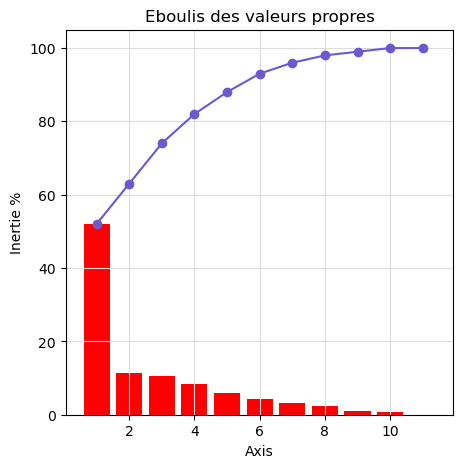

In [13]:
# Scree. Plot
plt.figure(figsize=(5,5))
plt.bar(a_list, scree,color="red")
plt.plot(a_list, scree_cum,color='slateblue',marker='o')
plt.xlabel("Axis")
plt.ylabel("Inertie %")
plt.title("Eboulis des valeurs propres")
plt.grid(axis='both', color='gainsboro')
plt.savefig("eboulis.png", bbox_inches='tight')
plt.show(block=False)

Les 4 premiers axes regroupent près de 80% de la vairiance (loi Pareto), nous les analyserons plus particulièrement.

### 3.3 - Analyse des composantes : <a class="anchor" id="chap3.3"></a>

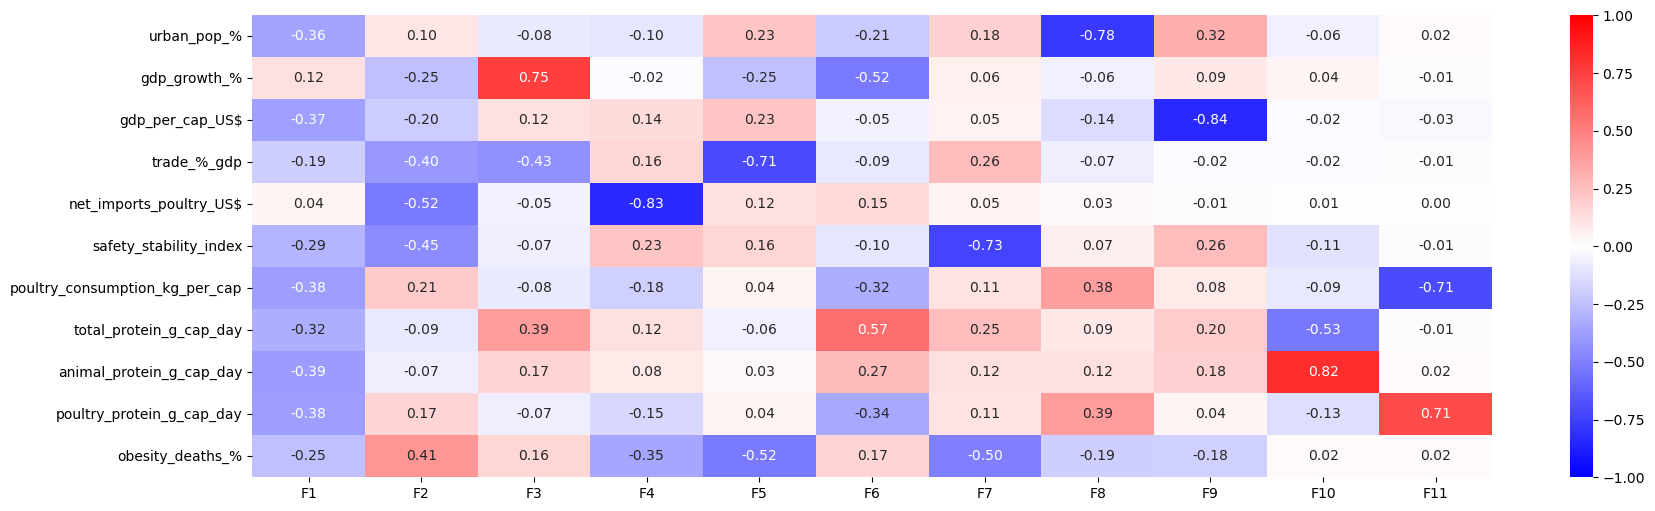

In [14]:
# Création du sataset des composantes : 
acp_components = pd.DataFrame(pca.components_)
acp_components.columns = features
acp_components.index = [f"F{i}" for i in a_list]

# Heatmap :
fig, ax = plt.subplots(figsize=(20, 6))
acp_heatmap = sns.heatmap(acp_components.T.round(2), vmin=-1, vmax=1, annot=True, cmap="bwr", fmt="0.2f")
plt.savefig("acp_heatmap.png")

In [15]:
#Fonction pour la création des cercles de corrélation :
def correlation_graph(pca, 
                      x_y, 
                      features, c="red") : 
    
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(8,8))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.02,
                head_length=0.02, 
                width=0.01, color="red")

        # Les labels
        plt.text(pca.components_[x, i] + 0.02,
                pca.components_[y, i] - 0.02,
                features[i], fontsize=8)
        
    
    # plot thicker abscissa and ordinate lines
    plt.axvline(x=0, c='gainsboro', lw=1, linestyle='solid')
    plt.axhline(y=0, c='gainsboro', lw=1, linestyle='solid')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],2)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],2)))
    
  
    # Ajout du titre
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1), fontsize=12)

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an), color='gainsboro', ls='--')

    # Axes et display
    plt.axis('equal')
    plt.grid(axis='both', color='gainsboro', linewidth=0.5)
    plt.show(block=False)

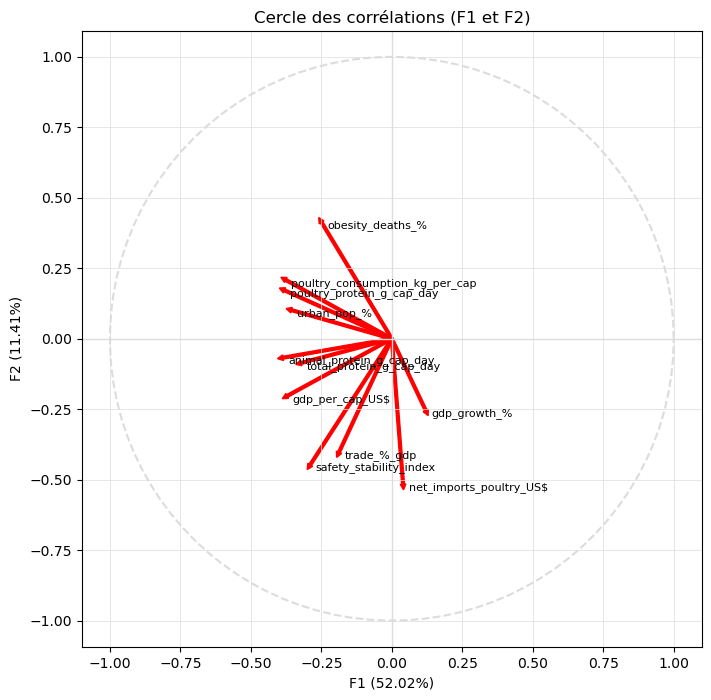

In [16]:
# Cercle des corrélations pour F1 et F2 :
x_y = (0,1)
correlation_graph(pca, x_y, features)

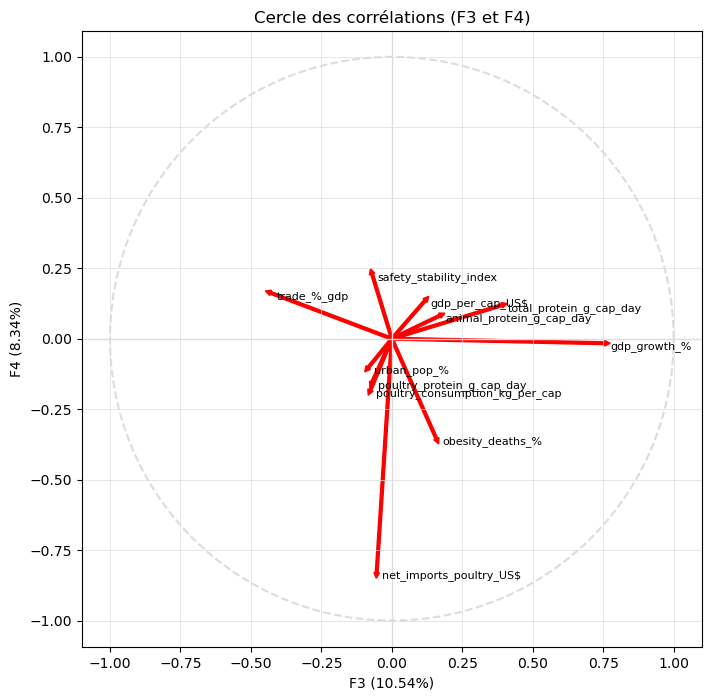

In [17]:
# Cercle des corrélations pour F3 et F4 :
x_y = (2,3)
correlation_graph(pca, x_y, features)

# 4 - Classification ascendante hiérarchique : <a class="anchor" id="chap4"></a>

In [18]:
#Scaling et linkage :
std_scale = StandardScaler()
std_scale.fit(data_acp)
y_scaled = std_scale.transform(data_acp)
Z = shc.linkage(y_scaled, method="ward", optimal_ordering=True,
                metric='euclidean')

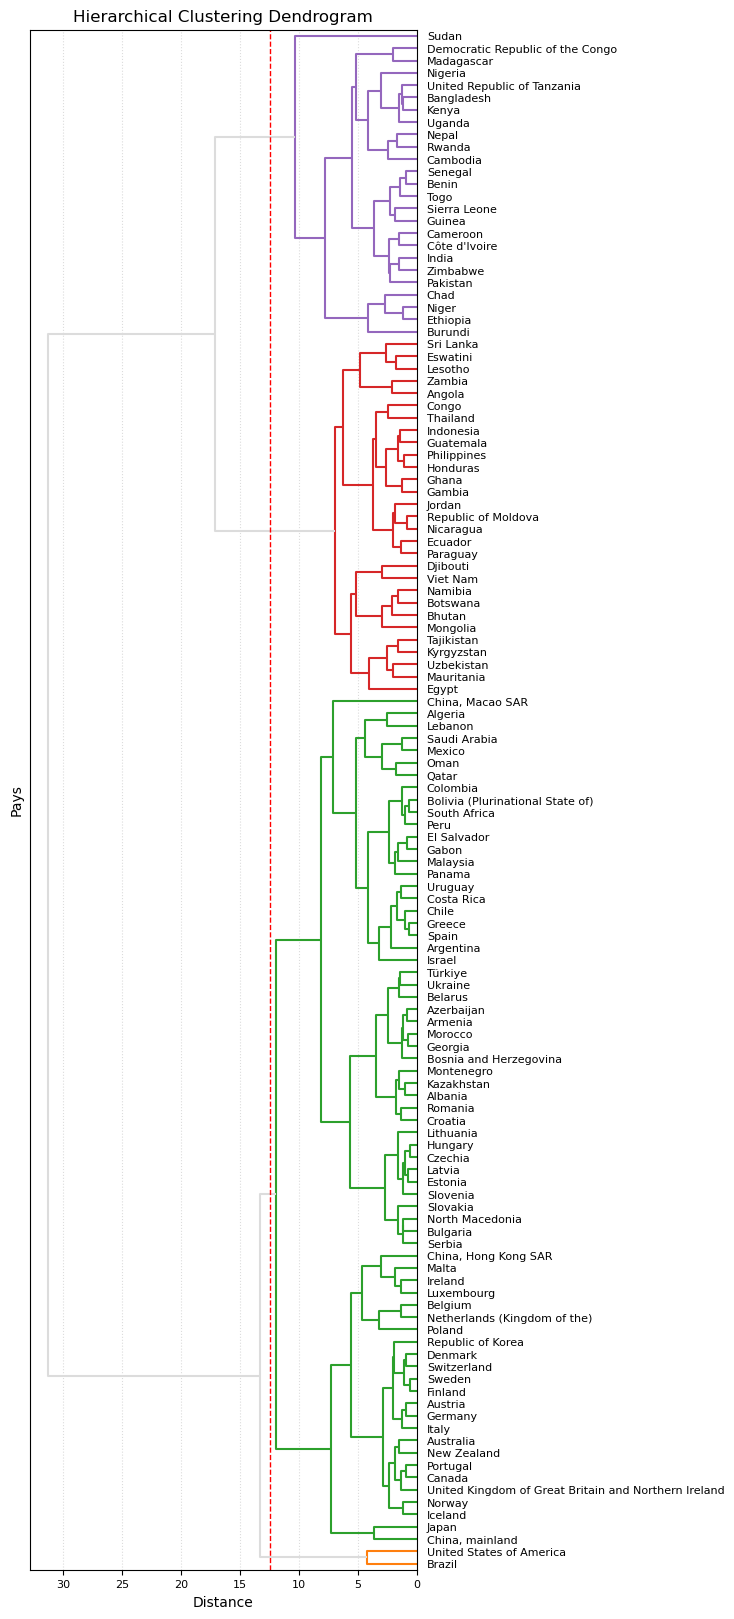

In [19]:
#Dendogramme :
limit = 12.5
fig, ax = plt.subplots(1, 1, figsize=(5,20))
detailed_dendro = shc.dendrogram(Z, ax=ax, labels=countries, orientation = "left", color_threshold=limit,
                        leaf_rotation=0, above_threshold_color='gainsboro', leaf_font_size=6)
plt.title("Hierarchical Clustering Dendrogram")
ax.set_xlabel("Distance")
ax.set_ylabel("Pays")
ax.tick_params(axis='x', which='major', labelsize=8)
ax.tick_params(axis='y', which='major', labelsize=8)
plt.grid(axis='x', color='gainsboro', linestyle='dotted')
plt.axvline(x=limit, c='red', lw=1, linestyle='dashed')
plt.savefig("detailed_dendro_v.png", bbox_inches='tight')
plt.show()

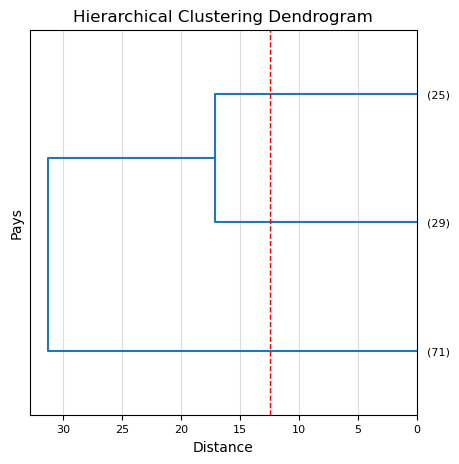

In [20]:
# Découpage à 3 clusters :
nb_clusters_dendro_x = 3
fig, ax = plt.subplots(1, 1, figsize=(5,5))
dendro_4clust = shc.dendrogram(Z, ax=ax, labels=countries, orientation = "left",
                         truncate_mode = 'lastp', p=nb_clusters_dendro_x, color_threshold=limit,
                         leaf_font_size=12, leaf_rotation=0)
plt.title("Hierarchical Clustering Dendrogram")
ax.set_xlabel("Distance")
ax.set_ylabel("Pays")
ax.tick_params(axis='x', which='major', labelsize=8)
ax.tick_params(axis='y', which='major', labelsize=8)
plt.grid(axis='x', color='gainsboro')
plt.axvline(x=limit, c='red', lw=1, linestyle='dashed')
plt.savefig("dendro_3clust.png", bbox_inches='tight')
plt.show()

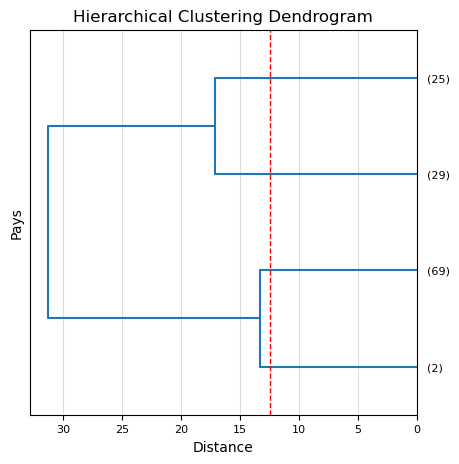

In [21]:
# Découpage à 4 clusters :
nb_clusters_dendro = 4
fig, ax = plt.subplots(1, 1, figsize=(5,5))
dendro_4clust = shc.dendrogram(Z, ax=ax, labels=countries, orientation = "left",
                         truncate_mode = 'lastp', p=nb_clusters_dendro, color_threshold=limit,
                         leaf_font_size=12, leaf_rotation=0)
plt.title("Hierarchical Clustering Dendrogram")
ax.set_xlabel("Distance")
ax.set_ylabel("Pays")
ax.tick_params(axis='x', which='major', labelsize=8)
ax.tick_params(axis='y', which='major', labelsize=8)
plt.grid(axis='x', color='gainsboro')
plt.axvline(x=limit, c='red', lw=1, linestyle='dashed')
plt.savefig("dendro_4clust.png", bbox_inches='tight')
plt.show()

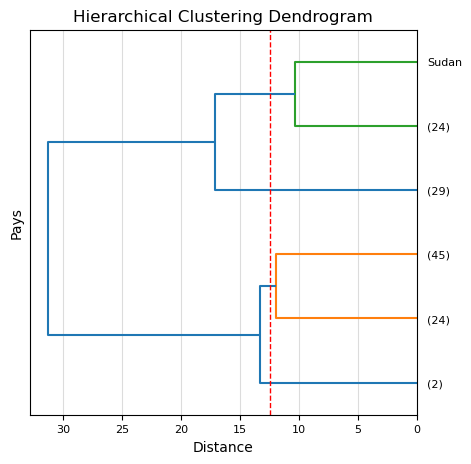

In [22]:
# Découpage à 6 clusters :
nb_clusters_dendro_y = 6
fig, ax = plt.subplots(1, 1, figsize=(5,5))
dendro_4clust = shc.dendrogram(Z, ax=ax, labels=countries, orientation = "left",
                         truncate_mode = 'lastp', p=nb_clusters_dendro_y, color_threshold=limit,
                         leaf_font_size=12, leaf_rotation=0)
plt.title("Hierarchical Clustering Dendrogram")
ax.set_xlabel("Distance")
ax.set_ylabel("Pays")
ax.tick_params(axis='x', which='major', labelsize=8)
ax.tick_params(axis='y', which='major', labelsize=8)
plt.grid(axis='x', color='gainsboro')
plt.axvline(x=limit, c='red', lw=1, linestyle='dashed')
plt.savefig("dendro_6clust.png", bbox_inches='tight')
plt.show()

Quelque soit le nombre de clusters, les données présentent dans le dataset nous donne des résultats disparates. Nous conserverons le découpage à 4 clusters pour la suite de l'étude.

In [23]:
# Affichage des pays par clusters :
k = nb_clusters_dendro
dendro_clusters = shc.fcluster(Z, k, criterion='maxclust')
data_clust = pd.DataFrame({"pays" : countries, "cluster_dendro" : dendro_clusters})

for i in range(1, k+1) : 
    # select cluster
    sub_data_clust = data_clust.loc[data_clust['cluster_dendro'] == i]
    # print cluster
    print(f"cluster : {i}")
    # select country
    pays_list = sub_data_clust['pays'].values
    # create list of countries
    txt = [f"{p}" for p in pays_list]
    # add countries to list
    txt = " / ".join(txt)
    # print clusters
    print(txt)
    print("\n\n")

cluster : 1
Brazil / United States of America



cluster : 2
Albania / Algeria / Argentina / Armenia / Australia / Austria / Azerbaijan / Belarus / Belgium / Bolivia (Plurinational State of) / Bosnia and Herzegovina / Bulgaria / Canada / Chile / China, Hong Kong SAR / China, Macao SAR / China, mainland / Colombia / Costa Rica / Croatia / Czechia / Denmark / El Salvador / Estonia / Finland / Gabon / Georgia / Germany / Greece / Hungary / Iceland / Ireland / Israel / Italy / Japan / Kazakhstan / Latvia / Lebanon / Lithuania / Luxembourg / Malaysia / Malta / Mexico / Montenegro / Morocco / Netherlands (Kingdom of the) / New Zealand / North Macedonia / Norway / Oman / Panama / Peru / Poland / Portugal / Qatar / Republic of Korea / Romania / Saudi Arabia / Serbia / Slovakia / Slovenia / South Africa / Spain / Sweden / Switzerland / Türkiye / Ukraine / United Kingdom of Great Britain and Northern Ireland / Uruguay



cluster : 3
Angola / Bhutan / Botswana / Congo / Djibouti / Ecuador / Egypt

In [24]:
# Ajout des données de clusters au dataset de base :
data_dendro = data_acp.copy().reset_index()
data_dendro

country  urban_pop_%  gdp_growth_%  gdp_per_cap_US$  trade_%_gdp  \
0       Albania    -0.450340     -1.752778         8.571345     4.110381   
1       Algeria    -0.307449    -15.147118         8.117955     3.825201   
2        Angola    -0.421236    -29.625968         7.467488     4.203311   
3     Argentina    -0.071703    -13.894724         9.054938     3.406123   
4       Armenia    -0.410746     -7.177995         8.413136     4.241197   
..          ...          ...           ...              ...          ...   
120     Uruguay    -0.027020    -12.526994         9.656278     3.836616   
121  Uzbekistan    -0.693565     -0.022316         7.487996     4.127011   
122    Viet Nam    -0.967564      3.526712         7.939376     5.338759   
123      Zambia    -0.819998    -22.306490         6.863628     4.373559   
124    Zimbabwe    -1.011180     -4.115044         7.231715     4.330759   

     net_imports_poultry_US$  safety_stability_index  \
0                 30260000.0                    0.08   
1                 26264000.0                   -0.86   
2                196303000.0                   -0.52   
3               -223375000.0                    0.04   
4                 33339000.0                   -0.57   
..                       ...                     ...   
120                8034000.0                    1.05   
121               28770000.0                   -0.44   
122              286086000.0                   -0.07   
123                7707000.0                   -0.13   
124                2916000.0                   -1.08   

     poultry_consumption_kg_per_cap  total_protein_g_cap_day  \
0                          2.659025                 4.700299   
1                          1.787882                 4.480967   
2                          2.087549                 3.782825   
3                          3.814713                 4.721797   
4                          2.791003                 4.581082   
..                              ...                      ...   
120                        3.097242                 4.463722   
121                        1.002779                 4.636766   
122                        2.646275                 4.342636   
123                        0.942427                 3.928880   
124                        1.475095                 4.006060   

     animal_protein_g_cap_day  poultry_protein_g_cap_day  obesity_deaths_%  
0                    4.079484                   1.719189          2.554899  
1                    3.210675                   0.559616          2.836737  
2                    2.485294                   1.018847          1.652497  
3                    4.226718                   2.665838          2.339881  
4                    3.882216                   1.667707          2.732418  
..                        ...                        ...               ...  
120                  3.920146                   1.954445          2.253395  
121                  3.850133                  -0.072571          2.813011  
122                  3.610434                   1.551809          1.710188  
123                  2.510877                  -0.116534          1.916923  
124                  3.151920                   0.438255          1.860975  

[125 rows x 12 columns]

In [25]:
# Création. du dataset :
clusters = pd.merge(data_dendro, data_clust, how='left', left_on='country', right_on='pays' ).drop(['pays','country'], axis=1)
clusters
# Afficher les clusters avec les valeurs moyennes :
clusters_dendro_avg = clusters.groupby('cluster_dendro').mean()
clusters_dendro_avg

urban_pop_%  gdp_growth_%  gdp_per_cap_US$  trade_%_gdp  \
cluster_dendro                                                            
1                 -0.169601    -12.253686         9.934921     3.314231   
2                 -0.289634     -5.887145         9.730193     4.403747   
3                 -0.698734     -5.474202         7.872320     4.312837   
4                 -1.126431      2.371337         6.955715     3.617732   

                net_imports_poultry_US$  safety_stability_index  \
cluster_dendro                                                    
1                         -4.480669e+09               -0.220000   
2                          6.164255e+07                0.297246   
3                          3.638145e+07               -0.223103   
4                          1.093188e+07               -0.960800   

                poultry_consumption_kg_per_cap  total_protein_g_cap_day  \
cluster_dendro                                                            
1                                     3.873794                 4.618831   
2                                     3.162040                 4.528510   
3                                     2.225483                 4.191558   
4                                     0.713374                 4.031056   

                animal_protein_g_cap_day  poultry_protein_g_cap_day  \
cluster_dendro                                                        
1                               4.168462                   2.784378   
2                               3.962196                   2.155670   
3                               3.198995                   1.164616   
4                               2.418311                  -0.363340   

                obesity_deaths_%  
cluster_dendro                    
1                       2.525021  
2                       2.461024  
3                       2.346791  
4                       1.717268

In [26]:
clusters

urban_pop_%  gdp_growth_%  gdp_per_cap_US$  trade_%_gdp  \
0      -0.450340     -1.752778         8.571345     4.110381   
1      -0.307449    -15.147118         8.117955     3.825201   
2      -0.421236    -29.625968         7.467488     4.203311   
3      -0.071703    -13.894724         9.054938     3.406123   
4      -0.410746     -7.177995         8.413136     4.241197   
..           ...           ...              ...          ...   
120    -0.027020    -12.526994         9.656278     3.836616   
121    -0.693565     -0.022316         7.487996     4.127011   
122    -0.967564      3.526712         7.939376     5.338759   
123    -0.819998    -22.306490         6.863628     4.373559   
124    -1.011180     -4.115044         7.231715     4.330759   

     net_imports_poultry_US$  safety_stability_index  \
0                 30260000.0                    0.08   
1                 26264000.0                   -0.86   
2                196303000.0                   -0.52   
3               -223375000.0                    0.04   
4                 33339000.0                   -0.57   
..                       ...                     ...   
120                8034000.0                    1.05   
121               28770000.0                   -0.44   
122              286086000.0                   -0.07   
123                7707000.0                   -0.13   
124                2916000.0                   -1.08   

     poultry_consumption_kg_per_cap  total_protein_g_cap_day  \
0                          2.659025                 4.700299   
1                          1.787882                 4.480967   
2                          2.087549                 3.782825   
3                          3.814713                 4.721797   
4                          2.791003                 4.581082   
..                              ...                      ...   
120                        3.097242                 4.463722   
121                        1.002779                 4.636766   
122                        2.646275                 4.342636   
123                        0.942427                 3.928880   
124                        1.475095                 4.006060   

     animal_protein_g_cap_day  poultry_protein_g_cap_day  obesity_deaths_%  \
0                    4.079484                   1.719189          2.554899   
1                    3.210675                   0.559616          2.836737   
2                    2.485294                   1.018847          1.652497   
3                    4.226718                   2.665838          2.339881   
4                    3.882216                   1.667707          2.732418   
..                        ...                        ...               ...   
120                  3.920146                   1.954445          2.253395   
121                  3.850133                  -0.072571          2.813011   
122                  3.610434                   1.551809          1.710188   
123                  2.510877                  -0.116534          1.916923   
124                  3.151920                   0.438255          1.860975   

     cluster_dendro  
0                 2  
1                 2  
2                 3  
3                 2  
4                 2  
..              ...  
120               2  
121               3  
122               3  
123               3  
124               4  

[125 rows x 12 columns]

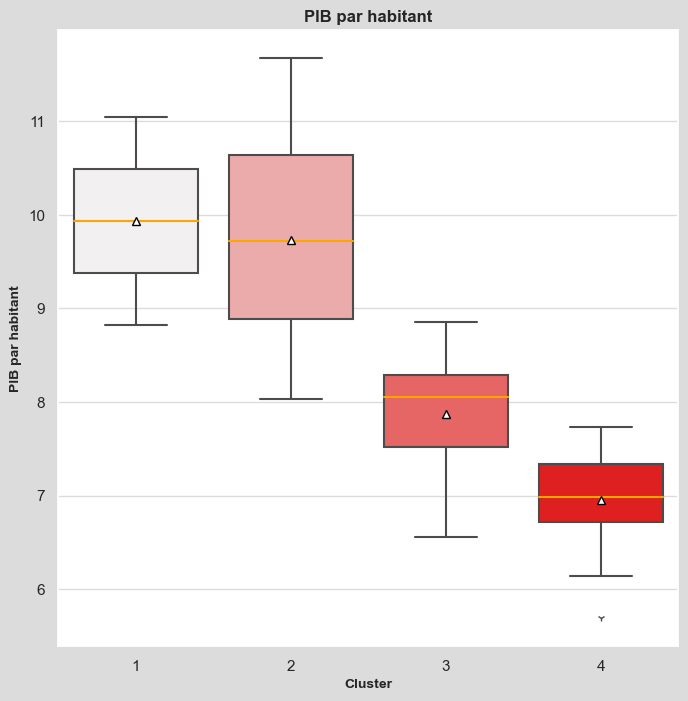

In [27]:
# Box plot des clusters / Pib par habitant : 
sns.set(rc={'figure.figsize':(8,8), 'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
dendro_box_gdp = sns.boxplot(data=clusters, x="cluster_dendro", y="gdp_per_cap_US$", hue="cluster_dendro", flierprops={"marker": "1"},
            medianprops={"color" : "orange"}, meanprops={"markerfacecolor":"white", "markeredgecolor":"black"},
            orient="v", color="red", showmeans=True, dodge=False)
plt.xlabel('Cluster', fontweight='bold', fontsize=10)
plt.ylabel('PIB par habitant', fontweight='bold', fontsize=10)
plt.title('PIB par habitant', fontweight='bold', fontsize=12)
plt.legend('', frameon=False)
plt.grid(axis='y', color='gainsboro')

plt.savefig("dendro_box_gdp.png", bbox_inches='tight')
plt.show()

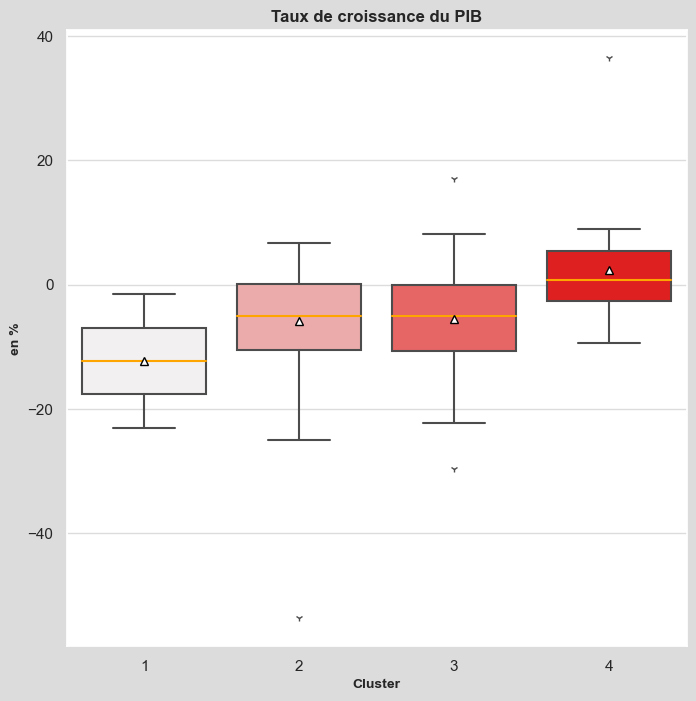

In [28]:
# Box plot des clusters / Taux de croissance du PIB :
sns.set(rc={'figure.figsize':(8,8), 'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
dendro_box_gdp_growth = sns.boxplot(data=clusters, x="cluster_dendro", y="gdp_growth_%", hue="cluster_dendro", flierprops={"marker": "1"},
            medianprops={"color" : "orange"}, meanprops={"markerfacecolor":"white", "markeredgecolor":"black"},
            orient="v", color="red", showmeans=True, dodge=False)
plt.xlabel('Cluster', fontweight='bold', fontsize=10)
plt.ylabel('en %', fontweight='bold', fontsize=10)
plt.title('Taux de croissance du PIB', fontweight='bold', fontsize=12)
plt.legend('', frameon=False)
plt.grid(axis='y', color='gainsboro')

plt.savefig("dendro_box_gdp_growth.png", bbox_inches='tight')
plt.show()

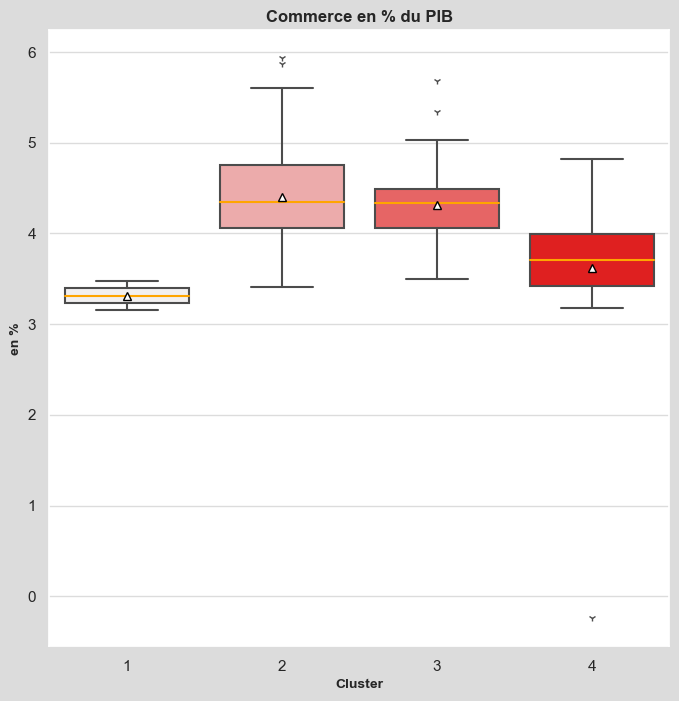

In [29]:
# Box plot des clusters / Commerce en % du PIB :
sns.set(rc={'figure.figsize':(8,8), 'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
dendro_box_trade = sns.boxplot(data=clusters, x="cluster_dendro", y="trade_%_gdp", hue="cluster_dendro", flierprops={"marker": "1"},
            medianprops={"color" : "orange"}, meanprops={"markerfacecolor":"white", "markeredgecolor":"black"},
            orient="v", color="red", showmeans=True, dodge=False)
plt.xlabel('Cluster', fontweight='bold', fontsize=10)
plt.ylabel('en %', fontweight='bold', fontsize=10)
plt.title('Commerce en % du PIB', fontweight='bold', fontsize=12)
plt.legend('', frameon=False)
plt.grid(axis='y', color='gainsboro')

plt.savefig("dendro_box_trade.png", bbox_inches='tight')
plt.show()

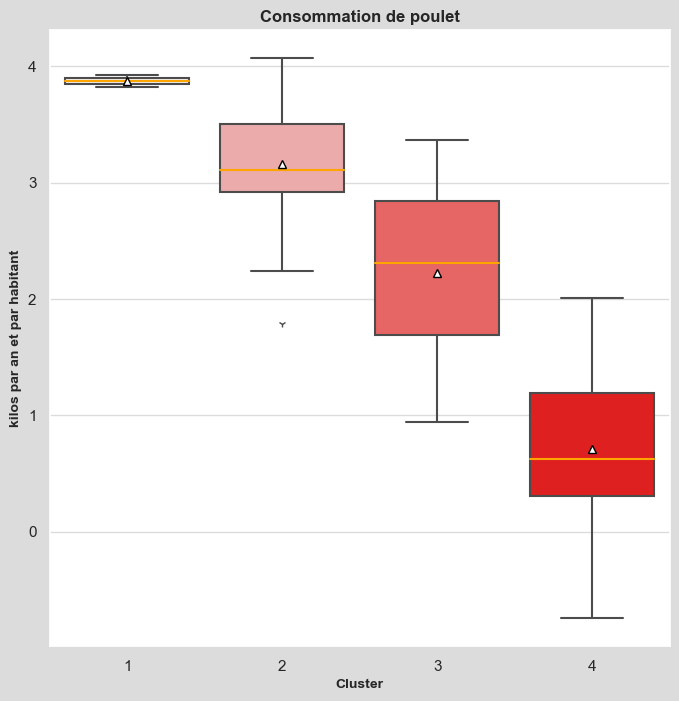

In [30]:
# Box plot des clusters / Consommation de poulet :
sns.set(rc={'figure.figsize':(8,8), 'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
dendro_box_chicken = sns.boxplot(data=clusters, x="cluster_dendro", y="poultry_consumption_kg_per_cap", hue="cluster_dendro", flierprops={"marker": "1"},
            medianprops={"color" : "orange"}, meanprops={"markerfacecolor":"white", "markeredgecolor":"black"},
            orient="v", color="red", showmeans=True, dodge=False)
plt.xlabel('Cluster', fontweight='bold', fontsize=10)
plt.ylabel('kilos par an et par habitant', fontweight='bold', fontsize=10)
plt.title('Consommation de poulet', fontweight='bold', fontsize=12)
plt.legend('', frameon=False)
plt.grid(axis='y', color='gainsboro')

plt.savefig("dendro_box_chicken.png", bbox_inches='tight')
plt.show()

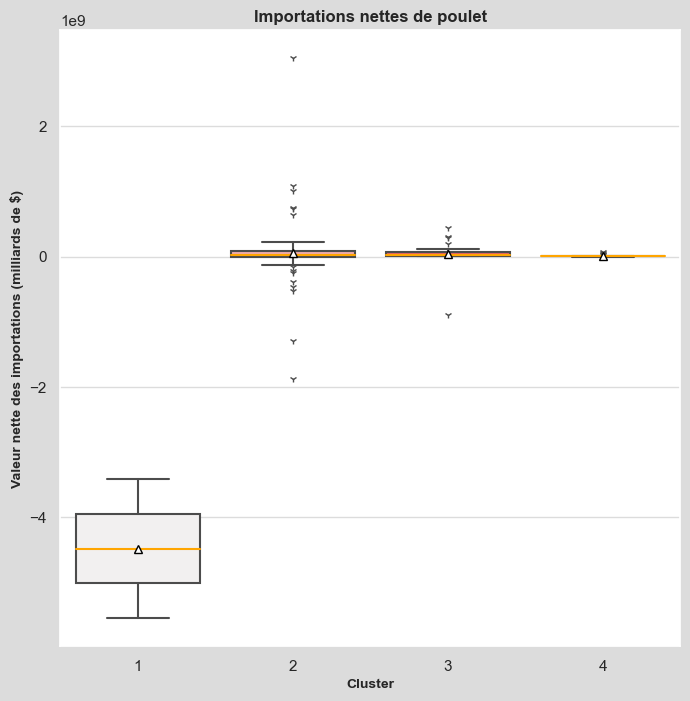

In [31]:
# Box plot des clusters / Importations nettes de poulet :
sns.set(rc={'figure.figsize':(8,8), 'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
dendro_box_net_M = sns.boxplot(data=clusters, x="cluster_dendro", y="net_imports_poultry_US$", hue="cluster_dendro", flierprops={"marker": "1"},
            medianprops={"color" : "orange"}, meanprops={"markerfacecolor":"white", "markeredgecolor":"black"},
            orient="v", color="red", showmeans=True, dodge=False)
plt.xlabel('Cluster', fontweight='bold', fontsize=10)
plt.ylabel("Valeur nette des importations (milliards de $)", fontweight='bold', fontsize=10)
plt.title('Importations nettes de poulet', fontweight='bold', fontsize=12)
plt.legend('', frameon=False)
plt.grid(axis='y', color='gainsboro')

plt.savefig("dendro_box_net_M.png", bbox_inches='tight')
plt.show()

# 5 - K-mean et clustering : <a class="anchor" id="chap5"></a>

### 5.1 - Nombre de clusters : <a class="anchor" id="chap5.1"></a>

In [32]:
# Création du dataset :
clusters2 = pd.merge(data_dendro, data_clust, how='left', left_on='country', right_on='pays' ).drop(['pays'], axis=1)
clusters2

country  urban_pop_%  gdp_growth_%  gdp_per_cap_US$  trade_%_gdp  \
0       Albania    -0.450340     -1.752778         8.571345     4.110381   
1       Algeria    -0.307449    -15.147118         8.117955     3.825201   
2        Angola    -0.421236    -29.625968         7.467488     4.203311   
3     Argentina    -0.071703    -13.894724         9.054938     3.406123   
4       Armenia    -0.410746     -7.177995         8.413136     4.241197   
..          ...          ...           ...              ...          ...   
120     Uruguay    -0.027020    -12.526994         9.656278     3.836616   
121  Uzbekistan    -0.693565     -0.022316         7.487996     4.127011   
122    Viet Nam    -0.967564      3.526712         7.939376     5.338759   
123      Zambia    -0.819998    -22.306490         6.863628     4.373559   
124    Zimbabwe    -1.011180     -4.115044         7.231715     4.330759   

     net_imports_poultry_US$  safety_stability_index  \
0                 30260000.0                    0.08   
1                 26264000.0                   -0.86   
2                196303000.0                   -0.52   
3               -223375000.0                    0.04   
4                 33339000.0                   -0.57   
..                       ...                     ...   
120                8034000.0                    1.05   
121               28770000.0                   -0.44   
122              286086000.0                   -0.07   
123                7707000.0                   -0.13   
124                2916000.0                   -1.08   

     poultry_consumption_kg_per_cap  total_protein_g_cap_day  \
0                          2.659025                 4.700299   
1                          1.787882                 4.480967   
2                          2.087549                 3.782825   
3                          3.814713                 4.721797   
4                          2.791003                 4.581082   
..                              ...                      ...   
120                        3.097242                 4.463722   
121                        1.002779                 4.636766   
122                        2.646275                 4.342636   
123                        0.942427                 3.928880   
124                        1.475095                 4.006060   

     animal_protein_g_cap_day  poultry_protein_g_cap_day  obesity_deaths_%  \
0                    4.079484                   1.719189          2.554899   
1                    3.210675                   0.559616          2.836737   
2                    2.485294                   1.018847          1.652497   
3                    4.226718                   2.665838          2.339881   
4                    3.882216                   1.667707          2.732418   
..                        ...                        ...               ...   
120                  3.920146                   1.954445          2.253395   
121                  3.850133                  -0.072571          2.813011   
122                  3.610434                   1.551809          1.710188   
123                  2.510877                  -0.116534          1.916923   
124                  3.151920                   0.438255          1.860975   

     cluster_dendro  
0                 2  
1                 2  
2                 3  
3                 2  
4                 2  
..              ...  
120               2  
121               3  
122               3  
123               3  
124               4  

[125 rows x 13 columns]

### 5.1.1 - Méthode du coude : <a class="anchor" id="chap5.1.1"></a>

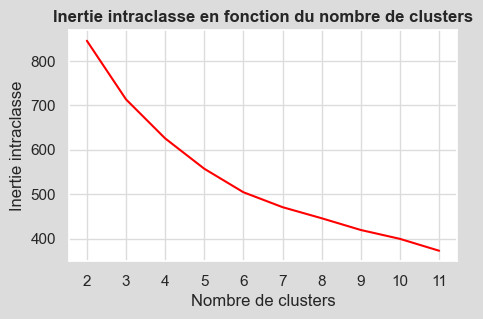

In [33]:
# Entre 2 et le nombre de colonnes (11) :
k_list = range(2, data_acp.shape[1]+1)

# Création de données pour "within-cluster sum of squares" pour k-means entre 2 et 11
wcss = []

for i in k_list :
    kmeans_wcss = KMeans(n_clusters=i, init='k-means++', copy_x=True, algorithm='lloyd', n_init=30,max_iter=300,verbose=0)
    kmeans_wcss.fit(x_scaled)
    wcss.append(kmeans_wcss.inertia_)

# Courbe de l'inertie interclasse pour obtenir le coude :
fig, ax = plt.subplots(1,1,figsize=(5,3))
ax.set_ylabel("Inertie intraclasse")
ax.set_xlabel("Nombre de clusters")
ax.set_title("Inertie intraclasse en fonction du nombre de clusters", fontsize=12, fontweight='bold')
ax = plt.plot(k_list, wcss, color="red")
plt.xticks(np.arange(min(k_list), max(k_list)+1, 1.0))
plt.grid(axis='both', color='gainsboro')
plt.savefig("kmeans_coude.png", bbox_inches='tight')
plt.show()

Pas de coude évident

### 5.1.2 - Silhouette score : <a class="anchor" id="chap5.1.2"></a>

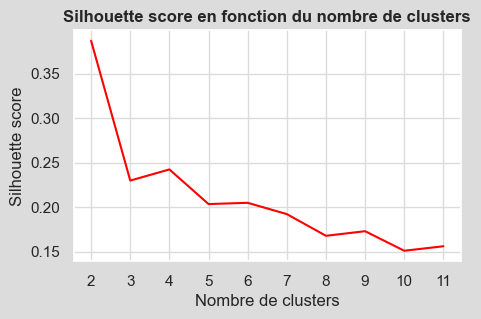

In [34]:
# Calcul du score pour le nombre de k-means :
silhouette = []

for j in k_list :
    kmeans_silh = KMeans(n_clusters=j, init='k-means++', copy_x=True, algorithm='lloyd', n_init=30,max_iter=300, verbose=0)
    kmeans_silh.fit(x_scaled)
    silh = silhouette_score(x_scaled, kmeans_silh.labels_)
    silhouette.append(silh)
    
# courbe du silhouette score : 
fig, ax = plt.subplots(1,1,figsize=(5,3))
ax.set_ylabel("Silhouette score")
ax.set_xlabel("Nombre de clusters")
ax.set_title("Silhouette score en fonction du nombre de clusters", fontsize=12, fontweight='bold')
ax = plt.plot(k_list, silhouette, color="red")
plt.xticks(np.arange(min(k_list), max(k_list)+1, 1.0))
plt.grid(axis='both', color='gainsboro')
plt.savefig("silhouette.png", bbox_inches='tight')
plt.show()

 Le score silhouette est maximal avec 2 clusters mais semble indiquer 4 ou 6 clusters comme acceptables.

### 5.1.3 - Indice de Davies-Bouldin : <a class="anchor" id="chap5.1.3"></a>

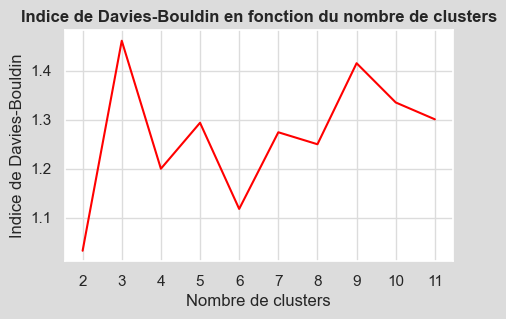

In [35]:
# Calcul du nombre de clusters k-means : 
dav_bould = []

for h in k_list :
    kmeans_db = KMeans(n_clusters=h, init='k-means++', copy_x=True, algorithm='lloyd', n_init=30,max_iter=300,verbose=0)
    kmeans_db.fit(x_scaled)
    d_b = davies_bouldin_score(x_scaled, kmeans_db.labels_)
    dav_bould.append(d_b)

# Courbe de Davies-Bouldin score : 
fig, ax = plt.subplots(1,1,figsize=(5,3))
ax.set_ylabel("Indice de Davies-Bouldin")
ax.set_xlabel("Nombre de clusters")
ax.set_title("Indice de Davies-Bouldin en fonction du nombre de clusters", fontsize=12, fontweight='bold')
ax = plt.plot(k_list, dav_bould, color="red")
plt.xticks(np.arange(min(k_list), max(k_list)+1, 1.0))
plt.grid(axis='both', color='gainsboro')
plt.savefig("davies_bouldin.png", bbox_inches='tight')
plt.show()

Le score de Davies-Bouldin est maximal pour 3 clusters et acceptable pour 5 et 7 clusters.
Au vu des 3 résultats, on procedera donc au clustering sur 4, 5 et 6 clusters afin de comparer les données et de decider du nombre de clusters que l'on gardera en fonction de l'ampleur des différences observées.

## 5.2 - K-means clustering sur 4, 5 et 6 clusters : <a class="anchor" id="chap5.2"></a>

### K-means sur 6 clusters

In [36]:
# Initialisation K-Means : 
kmeans_6 = KMeans(n_clusters=6, init='k-means++', copy_x=True, algorithm='lloyd', n_init=30, max_iter=300, verbose=0, random_state=10)
kmeans_6.fit(x_scaled)
labels_6 = kmeans_6.labels_
# Ajout du numéro de cluster pour les pays du dataset : 
clusters2['cluster_km_6'] = (kmeans_6.labels_ + 1)

# Affichage de la liste des pays de chaque cluster :
cluster_6_1 = clusters2.loc[clusters2['cluster_km_6'] == 1]['country'].tolist()
print('Pays du 1er cluster - ', len(cluster_6_1),'pays:\n', cluster_6_1)
cluster_6_2 = clusters2.loc[clusters2['cluster_km_6'] == 2]['country'].tolist()
print('Pays du 2eme cluster - ', len(cluster_6_2),'pays:\n', cluster_6_2)
cluster_6_3 = clusters2.loc[clusters2['cluster_km_6'] == 3]['country'].tolist()
print('Pays du 3eme cluster - ', len(cluster_6_3),'pays:\n', cluster_6_3)
cluster_6_4 = clusters2.loc[clusters2['cluster_km_6'] == 4]['country'].tolist()
print('Pays du 4eme cluster - ', len(cluster_6_4),'pays:\n', cluster_6_4)
cluster_6_5 = clusters2.loc[clusters2['cluster_km_6'] == 5]['country'].tolist()
print('Pays du 5eme cluster - ', len(cluster_6_5),'pays:\n', cluster_6_5)
cluster_6_6 = clusters2.loc[clusters2['cluster_km_6'] == 6]['country'].tolist()
print('Pays du 6eme cluster - ', len(cluster_6_6),'pays:\n', cluster_6_6)

Pays du 1er cluster -  28 pays:
 ['Algeria', 'Angola', 'Bhutan', 'Botswana', 'Congo', 'Djibouti', 'Egypt', 'Eswatini', 'Gambia', 'Ghana', 'Guatemala', 'Honduras', 'Indonesia', 'Kyrgyzstan', 'Lesotho', 'Mauritania', 'Namibia', 'Nicaragua', 'Pakistan', 'Paraguay', 'Philippines', 'Senegal', 'Sri Lanka', 'Tajikistan', 'Thailand', 'Uzbekistan', 'Viet Nam', 'Zimbabwe']
Pays du 2eme cluster -  37 pays:
 ['Australia', 'Austria', 'Belgium', 'Canada', 'China, Hong Kong SAR', 'China, mainland', 'Costa Rica', 'Croatia', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'Germany', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Japan', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Mongolia', 'Netherlands (Kingdom of the)', 'New Zealand', 'Norway', 'Poland', 'Portugal', 'Republic of Korea', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom of Great Britain and Northern Ireland', 'Uruguay']
Pays du 3eme cluster -  35 pays:
 ['Albania', 'Argentina', 'Armenia', 'Azerbaijan', 'B

### K-means sur 5 clusters


In [37]:
# Initialisation K-Means : 
kmeans_5 = KMeans(n_clusters=5, init='k-means++', copy_x=True, algorithm='lloyd', n_init=30, max_iter=300, verbose=0, random_state=10)
kmeans_5.fit(x_scaled)
labels_5 = kmeans_5.labels_
# Ajout du numéro de cluster pour les pays du dataset :
clusters2['cluster_km_5'] = (kmeans_5.labels_ + 1)

# Affichage de la liste des pays de chaque cluster :
cluster_5_1 = clusters2.loc[clusters2['cluster_km_5'] == 1]['country'].tolist()
print('Pays du 1er cluster - ', len(cluster_5_1),'pays:\n', cluster_5_1)
cluster_5_2 = clusters2.loc[clusters2['cluster_km_5'] == 2]['country'].tolist()
print('Pays du 2eme cluster - ', len(cluster_5_2),'pays:\n', cluster_5_2)
cluster_5_3 = clusters2.loc[clusters2['cluster_km_5'] == 3]['country'].tolist()
print('Pays du 3eme cluster - ', len(cluster_5_3),'pays:\n', cluster_5_3)
cluster_5_4 = clusters2.loc[clusters2['cluster_km_5'] == 4]['country'].tolist()
print('Pays du 4eme cluster - ', len(cluster_5_4),'pays:\n', cluster_5_4)
cluster_5_5 = clusters2.loc[clusters2['cluster_km_5'] == 5]['country'].tolist()
print('Pays du 5eme cluster - ', len(cluster_5_5),'pays:\n', cluster_5_5)

Pays du 1er cluster -  22 pays:
 ['Angola', 'Bhutan', 'Botswana', 'Congo', 'Djibouti', 'Eswatini', 'Gambia', 'Ghana', 'Honduras', 'Indonesia', 'Kyrgyzstan', 'Lesotho', 'Mauritania', 'Namibia', 'Philippines', 'Senegal', 'Sri Lanka', 'Tajikistan', 'Thailand', 'Viet Nam', 'Zambia', 'Zimbabwe']
Pays du 2eme cluster -  23 pays:
 ['Bangladesh', 'Benin', 'Burundi', 'Cambodia', 'Cameroon', 'Chad', "Côte d'Ivoire", 'Democratic Republic of the Congo', 'Ethiopia', 'Guinea', 'India', 'Kenya', 'Madagascar', 'Nepal', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Sierra Leone', 'Sudan', 'Togo', 'Uganda', 'United Republic of Tanzania']
Pays du 3eme cluster -  41 pays:
 ['Australia', 'Austria', 'Belgium', 'Canada', 'China, Hong Kong SAR', 'China, Macao SAR', 'China, mainland', 'Costa Rica', 'Croatia', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Mongolia', 'Netherlands (Kingdom o

### K-means sur 4 clusters

In [38]:
# Initialisation K-Means :
kmeans_4 = KMeans(n_clusters=nb_clusters_dendro, init='k-means++', copy_x=True, algorithm='lloyd', n_init=30, max_iter=300,
                  verbose=0, random_state=10)
kmeans_4.fit(x_scaled)
labels_4 = kmeans_4.labels_
# Ajout du numéro de cluster pour les pays du dataset :
clusters2['cluster_km_4'] = (kmeans_4.labels_ + 1)

# Affichage de la liste des pays de chaque cluster :
cluster_4_1 = clusters2.loc[clusters2['cluster_km_4'] == 1]['country'].tolist()
print('Pays du 1er cluster - ', len(cluster_4_1),'pays:\n', cluster_4_1)
cluster_4_2 = clusters2.loc[clusters2['cluster_km_4'] == 2]['country'].tolist()
print('Pays du 2eme cluster - ', len(cluster_4_2),'pays:\n', cluster_4_2)
cluster_4_3 = clusters2.loc[clusters2['cluster_km_4'] == 3]['country'].tolist()
print('Pays du 3eme cluster - ', len(cluster_4_3),'pays:\n', cluster_4_3)
cluster_4_4 = clusters2.loc[clusters2['cluster_km_4'] == 4]['country'].tolist()
print('Pays du 4eme cluster - ', len(cluster_4_4),'pays:\n', cluster_4_4)

Pays du 1er cluster -  46 pays:
 ['Algeria', 'Angola', 'Armenia', 'Azerbaijan', 'Belarus', 'Bhutan', 'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina', 'Botswana', 'Colombia', 'Congo', 'Ecuador', 'Egypt', 'El Salvador', 'Eswatini', 'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Guatemala', 'Honduras', 'Indonesia', 'Jordan', 'Kazakhstan', 'Kyrgyzstan', 'Lebanon', 'Lesotho', 'Mauritania', 'Mexico', 'Morocco', 'Namibia', 'Nicaragua', 'North Macedonia', 'Paraguay', 'Peru', 'Philippines', 'Republic of Moldova', 'Saudi Arabia', 'Serbia', 'South Africa', 'Sri Lanka', 'Thailand', 'Türkiye', 'Ukraine', 'Uzbekistan', 'Viet Nam']
Pays du 2eme cluster -  49 pays:
 ['Albania', 'Argentina', 'Australia', 'Austria', 'Belgium', 'Bulgaria', 'Canada', 'Chile', 'China, Hong Kong SAR', 'China, Macao SAR', 'China, mainland', 'Costa Rica', 'Croatia', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Lithuania', 'Luxemb

Quelque soit la méthode de calcul utilisée sur les données (log et scaler), le Brésil et les USA appartiennent à un cluster séparé. Et ceux pour tous les nombres de clusters choisis. C'est aussi vérifiable dans le dendogramme. Ceci est du à l'information sur leur exportation de poulet. <br>
On choisit de continuer l'analyse sur 5 clusters, en conservant à l'esprit que le cluster 5 sert à des fins éliminatoires (notre cible de marché ne peut être nos plus grands concurrents) et nous permet de conserver 4 clusters plus ou moins homogènes.

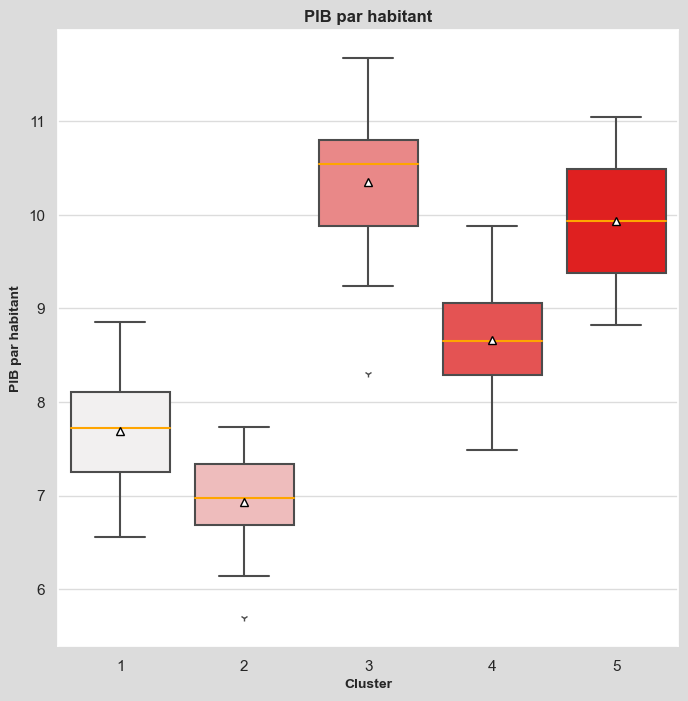

In [39]:
# Box plot clusters / PIB par habitant : 
sns.set(rc={'figure.figsize':(8,8), 'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
km_5_box_gdp = sns.boxplot(data=clusters2, x="cluster_km_5", y="gdp_per_cap_US$", hue="cluster_km_5", flierprops={"marker": "1"},
            medianprops={"color" : "orange"}, meanprops={"markerfacecolor":"white", "markeredgecolor":"black"},
            orient="v", color="red", showmeans=True, dodge=False)
plt.xlabel('Cluster', fontweight='bold', fontsize=10)
plt.ylabel('PIB par habitant', fontweight='bold', fontsize=10)
plt.title('PIB par habitant', fontweight='bold', fontsize=12)
plt.legend('', frameon=False)
plt.grid(axis='y', color='gainsboro')

plt.savefig("km_5_box_gdp.png", bbox_inches='tight')
plt.show()

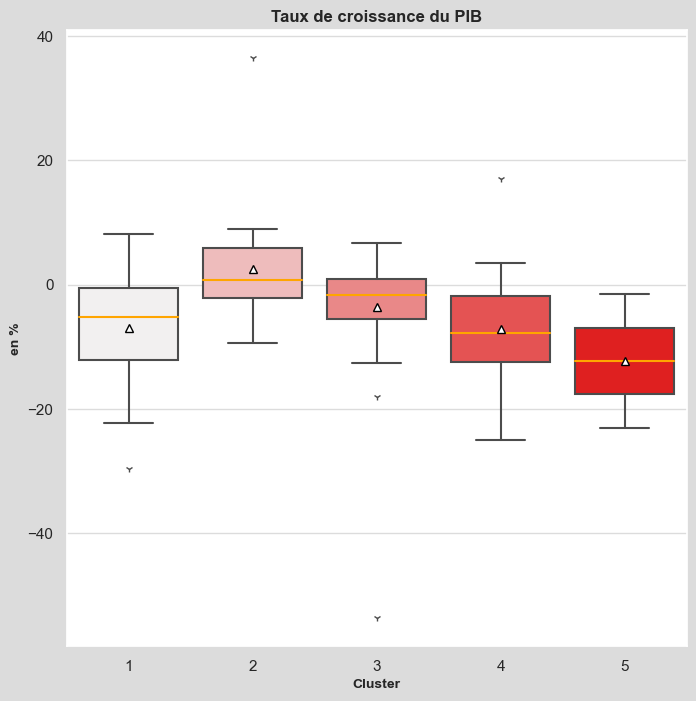

In [40]:
# Box plot clusters / Taux de croissance PIB :
sns.set(rc={'figure.figsize':(8,8), 'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
km_5_box_gdp_growth = sns.boxplot(data=clusters2, x="cluster_km_5", y="gdp_growth_%", hue="cluster_km_5", flierprops={"marker": "1"},
            medianprops={"color" : "orange"}, meanprops={"markerfacecolor":"white", "markeredgecolor":"black"},
            orient="v", color="red", showmeans=True, dodge=False)
plt.xlabel('Cluster', fontweight='bold', fontsize=10)
plt.ylabel('en %', fontweight='bold', fontsize=10)
plt.title('Taux de croissance du PIB', fontweight='bold', fontsize=12)
plt.legend('', frameon=False)
plt.grid(axis='y', color='gainsboro')

plt.savefig("km_5_box_gdp_growth.png", bbox_inches='tight')
plt.show()

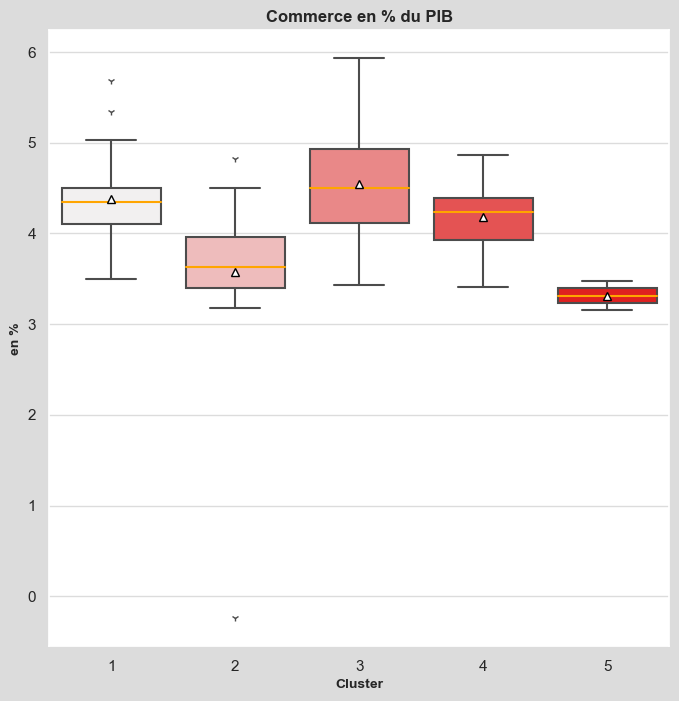

In [41]:
# Box plot clusters / Commerce en % du PIB : 
sns.set(rc={'figure.figsize':(8,8), 'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
km_4_box_trade = sns.boxplot(data=clusters2, x="cluster_km_5", y="trade_%_gdp", hue="cluster_km_5", flierprops={"marker": "1"},
            medianprops={"color" : "orange"}, meanprops={"markerfacecolor":"white", "markeredgecolor":"black"},
            orient="v", color="red", showmeans=True, dodge=False)
plt.xlabel('Cluster', fontweight='bold', fontsize=10)
plt.ylabel('en %', fontweight='bold', fontsize=10)
plt.title('Commerce en % du PIB', fontweight='bold', fontsize=12)
plt.legend('', frameon=False)
plt.grid(axis='y', color='gainsboro')

plt.savefig("km_5_box_trade.png", bbox_inches='tight')
plt.show()

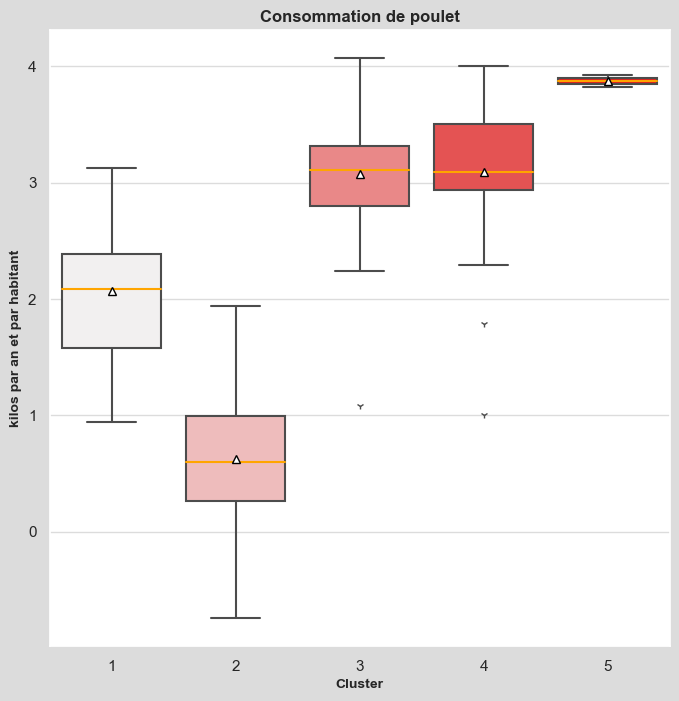

In [42]:
# Box plot clusters / Consommation de poulet :
sns.set(rc={'figure.figsize':(8,8), 'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
km_4_box_chicken = sns.boxplot(data=clusters2, x="cluster_km_5", y="poultry_consumption_kg_per_cap", hue="cluster_km_5", flierprops={"marker": "1"},
            medianprops={"color" : "orange"}, meanprops={"markerfacecolor":"white", "markeredgecolor":"black"},
            orient="v", color="red", showmeans=True, dodge=False)
plt.xlabel('Cluster', fontweight='bold', fontsize=10)
plt.ylabel('kilos par an et par habitant', fontweight='bold', fontsize=10)
plt.title('Consommation de poulet', fontweight='bold', fontsize=12)
plt.legend('', frameon=False)
plt.grid(axis='y', color='gainsboro')

plt.savefig("km_5_box_chicken.png", bbox_inches='tight')
plt.show()

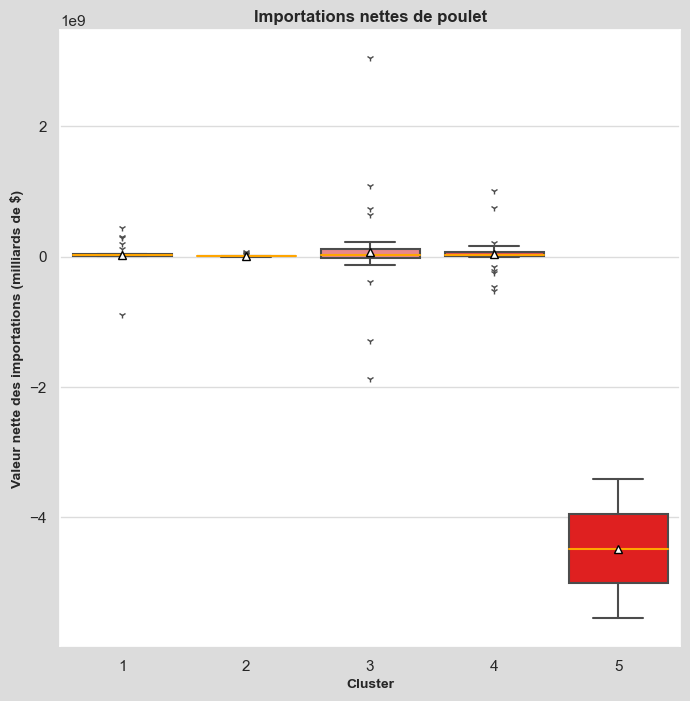

In [43]:
# Box plot clusters / Importations nettes de poulet :
sns.set(rc={'figure.figsize':(8,8), 'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
km_4_box_net_M = sns.boxplot(data=clusters2, x="cluster_km_5", y="net_imports_poultry_US$", hue="cluster_km_5", flierprops={"marker": "1"},
            medianprops={"color" : "orange"}, meanprops={"markerfacecolor":"white", "markeredgecolor":"black"},
            orient="v", color='red', showmeans=True, dodge=False)
plt.xlabel('Cluster', fontweight='bold', fontsize=10)
plt.ylabel("Valeur nette des importations (milliards de $)", fontweight='bold', fontsize=10)
plt.title('Importations nettes de poulet', fontweight='bold', fontsize=12)
plt.legend('', frameon=False)
plt.grid(axis='y', color='gainsboro')

plt.savefig("km_4_box_net_M.png", bbox_inches='tight')
plt.show()

## 5.3 - Analyse des centroids : <a class="anchor" id="chap5.3"></a>

In [44]:
#Création du dataset : 
centroids_5 = kmeans_5.cluster_centers_
centroids_km_5 = pd.DataFrame(centroids_5)
centroids_km_5.columns = features
centroids_km_5

urban_pop_%  gdp_growth_%  gdp_per_cap_US$  trade_%_gdp  \
0    -0.537756     -0.279580        -0.738717     0.254573   
1    -1.404524      0.712191        -1.271112    -0.932259   
2     0.663408      0.062584         1.123187     0.489182   
3     0.409619     -0.300431        -0.060073    -0.043446   
4     0.889528     -0.839809         0.829688    -1.303808   

   net_imports_poultry_US$  safety_stability_index  \
0                 0.081345               -0.152249   
1                 0.054608               -1.126111   
2                 0.143587                1.053566   
3                 0.097853               -0.367816   
4                -6.276590               -0.168504   

   poultry_consumption_kg_per_cap  total_protein_g_cap_day  \
0                       -0.353078                -0.796181   
1                       -1.636192                -1.147580   
2                        0.542493                 0.788907   
3                        0.558340                 0.261563   
4                        1.249677                 0.943641   

   animal_protein_g_cap_day  poultry_protein_g_cap_day  obesity_deaths_%  
0                 -0.580450                  -0.348603         -0.301988  
1                 -1.506502                  -1.640914         -1.295408  
2                  0.892634                   0.605489          0.055512  
3                  0.241452                   0.492738          0.894878  
4                  0.943860                   1.176958          0.525832

In [45]:
# Scatter polar plot pour les centroids : 
categories = centroids_km_5.columns
fig = go.Figure()
fig.add_trace(go.Scatterpolar(r=centroids_km_5.iloc[0], theta=categories, fill='toself', name='Cluster 1 centroide'))
fig.add_trace(go.Scatterpolar(r=centroids_km_5.iloc[1], theta=categories, fill='toself', name='Cluster 2 centroide'))
fig.add_trace(go.Scatterpolar(r=centroids_km_5.iloc[2], theta=categories, fill='toself', name='Cluster 3 centroide'))
fig.add_trace(go.Scatterpolar(r=centroids_km_5.iloc[3], theta=categories, fill='toself', name='Cluster 4 centroide'))
fig.add_trace(go.Scatterpolar(r=centroids_km_5.iloc[4], theta=categories, fill='toself', name='Cluster 5 centroide'))
fig.update_traces(opacity=0.5, selector=dict(type='scatterpolar'))
fig.update_layout(polar=dict(radialaxis=dict(visible=True,range=[0, centroids_km_5.max().max()])),showlegend=True)
fig.show()

### Projection des clusters & centroides du K-means à 5 clusters sur le premier plan factoriel

/Users/melissa/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning:

X has feature names, but PCA was fitted without feature names



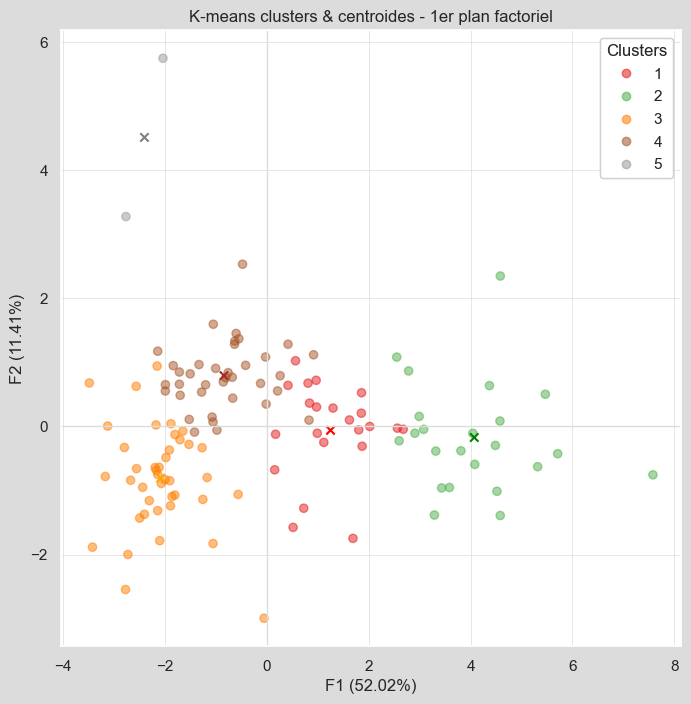

In [46]:
pca_kmeans = PCA(n_components=(5))
pca_kmeans.fit(x_scaled)
x_proj = pca_kmeans.transform(x_scaled)
x_proj = pd.DataFrame(x_proj, columns = ["PC1", "PC2", "PC3", "PC4", "PC5"])


# ACP
centroids_5_proj = pca_kmeans.transform(centroids_km_5)

# Création dataframe
centroids_5_proj = pd.DataFrame(centroids_5_proj,
                              columns = ["F1", "F2", "F3", "F4","F5"], 
                              index=["cluster_0", "cluster_1", "cluster_2", "cluster_3", "cluster_4"])

# Graphique : 
fig, ax = plt.subplots(1,1) 
scatter = ax.scatter(x_proj.iloc[:, 0], x_proj.iloc[:, 1], c= clusters2['cluster_km_5'], cmap="Set1", alpha =0.5)
ax.scatter(centroids_5_proj.iloc[:, 0], centroids_5_proj.iloc[:, 1],  marker="x",
                      c=["red","green", "orange",'brown','grey'])

ax.set_xlabel('F{} ({}%)'.format(1,round(100*pca.explained_variance_ratio_[0],2)))
ax.set_ylabel('F{} ({}%)'.format(2,round(100*pca.explained_variance_ratio_[1],2)))

# Lignes de abscisses et ordonnées : 
plt.axvline(x=0, c='gainsboro', lw=1, linestyle='solid')
plt.axhline(y=0, c='gainsboro', lw=1, linestyle='solid')

# Légende : une couleur par cluster :
legend_1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Clusters")
ax.add_artist(legend_1)

ax.set_title("K-means clusters & centroides - 1er plan factoriel")
plt.grid(axis='both', color='gainsboro', lw=0.5)
plt.savefig("Kmeans clusters & centroides - 1er plan factoriel.png", bbox_inches='tight')
plt.show()

In [47]:
#Fonction pour la création des plans factoriels : 

def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
 
    import matplotlib.pyplot as plt
    import numpy as np
    import seaborn as sns
    
    
    # Transformation de X_ en np.array : 
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (5,5)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c, palette="Set1")
    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x],2))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y],2))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}', fontsize=12)
    ax.set_ylabel(f'F{y+1} {v2}', fontsize=12)

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # plot thicker abscissa and ordinate lines
    plt.axvline(x=0, c='gainsboro', lw=1, linestyle='solid')
    plt.axhline(y=0, c='gainsboro', lw=1, linestyle='solid')
    plt.grid(axis='both', color='gainsboro', linewidth=0.5)

    # Affichage des labels des points
    if len(labels) : 
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='8', ha='center',va='center') 

    # Titre et affichage
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})", fontsize=12)
    plt.savefig("clusters&country.png", bbox_inches='tight')
    plt.show()

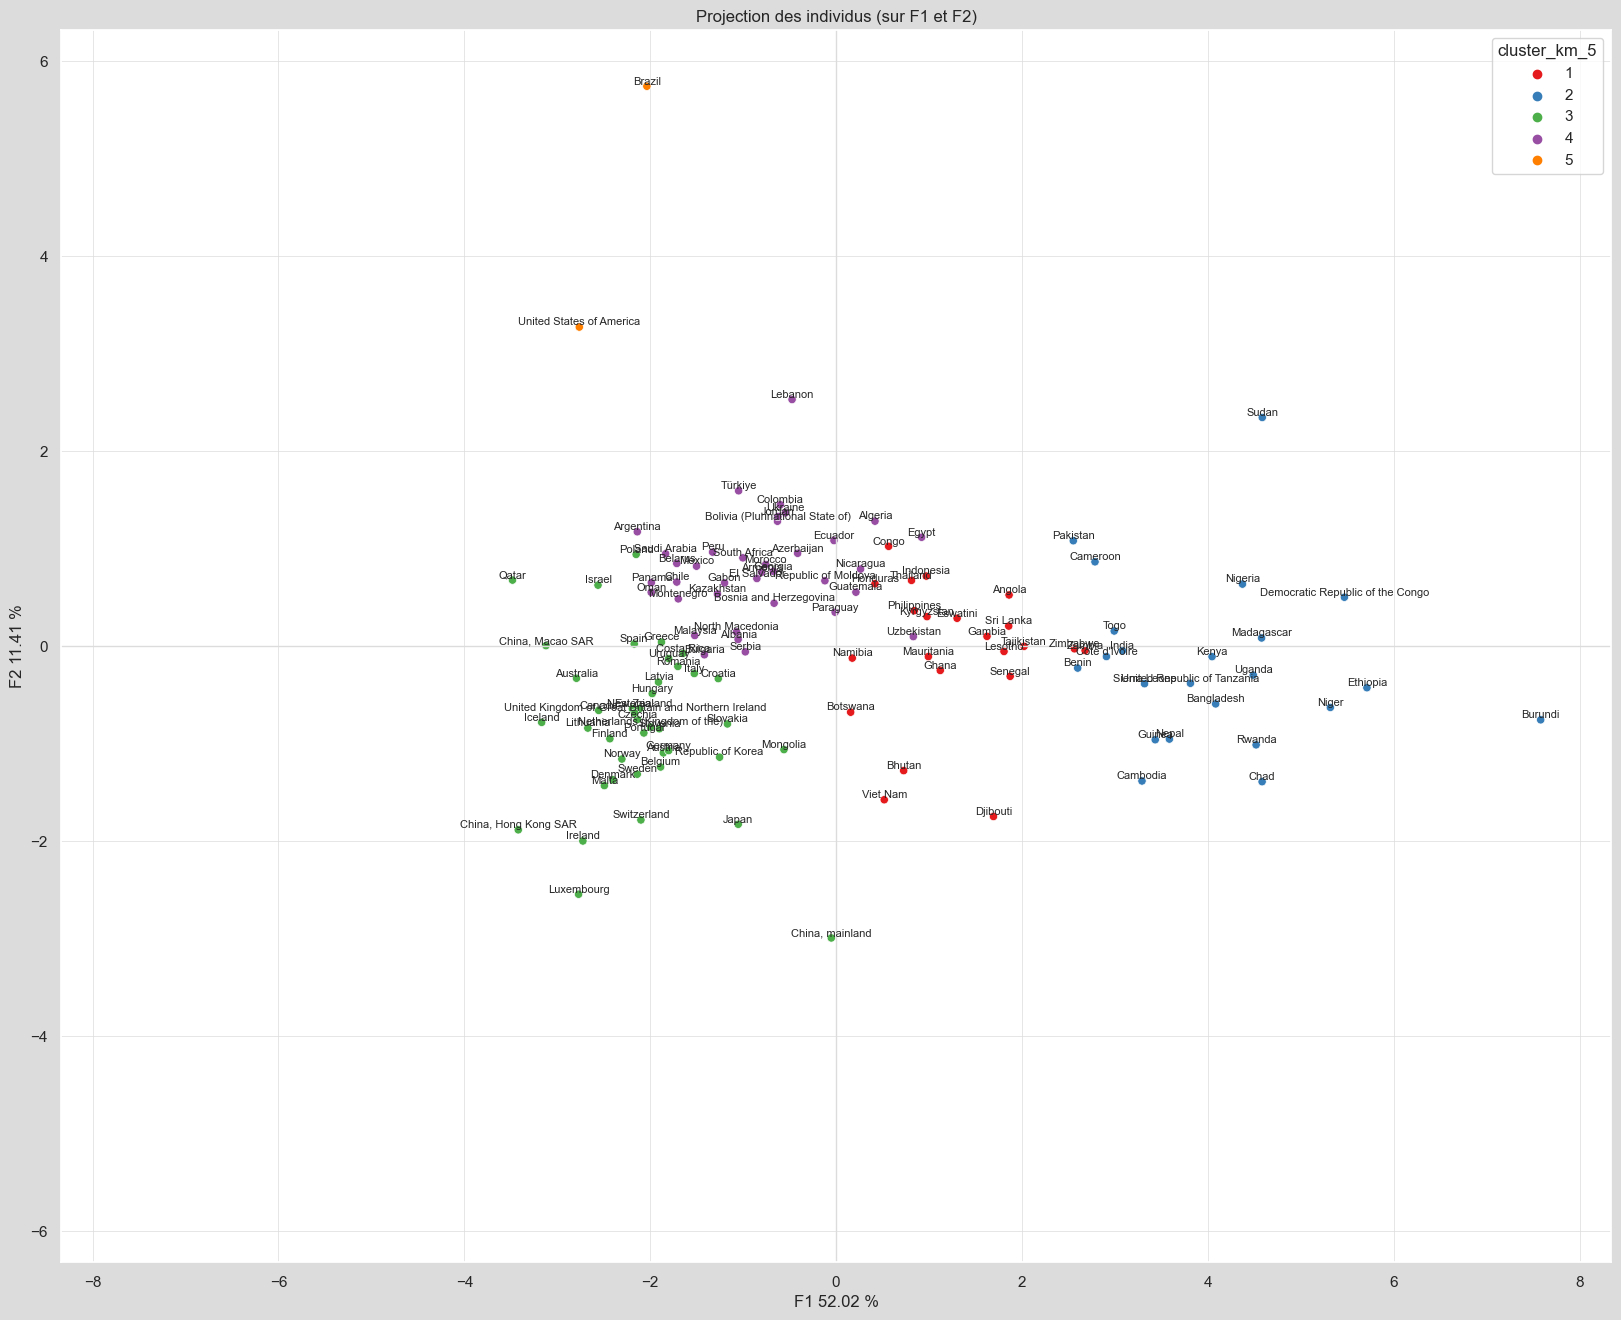

In [48]:
# Scatter plot avec les pays sur le premier plan factoriel :
x_y = (0,1)
display_factorial_planes(x_proj, x_y, pca, labels=countries, figsize=(20,16), clusters=clusters2['cluster_km_5'],
                         marker="o")

## 5.4 - Inertie totale des pays dans chaque cluster :  <a class="anchor" id="chap5.4"></a>

On peut utiliser les plays ayant la plus faible inertie dans chaque cluster pour décrire les caractéristiques moyennes du cluster auxquels ils appartiennet : ce sont les parangons.

In [49]:
# Création d'un dataframe pour calculer et stocker les distances 
#entre les points des clusters et les centroides : 

distances = pd.DataFrame(x_scaled, columns=data.columns)
distances['country'] = countries
distances_calc = pd.merge(clusters2, distances, how='left', right_on='country',left_on='country')

country_inertia = distances_calc[['country','cluster_km_5','urban_pop_%_y', 'gdp_growth_%_y', 'gdp_per_cap_US$_y', 'trade_%_gdp_y',
       'net_imports_poultry_US$_y', 'safety_stability_index_y',
       'poultry_consumption_kg_per_cap_y', 'total_protein_g_cap_day_y',
       'animal_protein_g_cap_day_y', 'poultry_protein_g_cap_day_y',
       'obesity_deaths_%_y']].copy()

country_inertia.rename(columns={'urban_pop_%_y': 'urban_pop_%', 'gdp_growth_%_y':'gdp_growth_%',
                            'gdp_per_cap_US$_y':'gdp_per_cap_US$', 'trade_%_gdp_y':'trade_%_gdp',
                            'net_imports_poultry_US$_y':'net_imports_poultry_US$',
                            'safety_stability_index_y':'safety_stability_index',
                            'poultry_consumption_kg_per_cap_y':'poultry_consumption_kg_per_cap', 
                            'total_protein_g_cap_day_y': 'total_protein_g_cap_day',
                            'animal_protein_g_cap_day_y':'animal_protein_g_cap_day',
                            'poultry_protein_g_cap_day_y':'poultry_protein_g_cap_day',
                            'obesity_deaths_%_y':'obesity_deaths_%'}, inplace=True)

In [50]:
#Calcul de cette distance au carré pour chaques centroids des clusters : 
country_inertia.loc[country_inertia['cluster_km_5'] == 1, features] = ((np.subtract((country_inertia.loc[country_inertia['cluster_km_5'] == 1, features]),(centroids_km_5.iloc[0])))**2).copy()
country_inertia.loc[country_inertia['cluster_km_5'] == 2, features] = ((np.subtract((country_inertia.loc[country_inertia['cluster_km_5'] == 2, features]),(centroids_km_5.iloc[1])))**2).copy()
country_inertia.loc[country_inertia['cluster_km_5'] == 3, features] = ((np.subtract((country_inertia.loc[country_inertia['cluster_km_5'] == 3, features]),(centroids_km_5.iloc[2])))**2).copy()
country_inertia.loc[country_inertia['cluster_km_5'] == 4, features] = ((np.subtract((country_inertia.loc[country_inertia['cluster_km_5'] == 4, features]),(centroids_km_5.iloc[3])))**2).copy()
country_inertia.loc[country_inertia['cluster_km_5'] == 5, features] = ((np.subtract((country_inertia.loc[country_inertia['cluster_km_5'] == 5, features]),(centroids_km_5.iloc[4])))**2).copy()

In [51]:
# Typage des données et somme des inerties : 
country_inertia['cluster_km_5'] = country_inertia['cluster_km_5'].astype(str)
country_inertia['inertia'] = country_inertia.sum(axis=1, numeric_only=True)

# Création d'un dataframe des distances avec sélections de colonnes : 
clusters_dist = pd.merge(clusters2, country_inertia, how='left', left_on='country',
                         right_on='country')[['country', 'cluster_km_5_x','inertia']]
clusters_dist.rename(columns={'cluster_km_5_x': 'cluster_km_5'}, inplace=True)

#Affichage des distances par ordre décroissant pour le cluster 1:  
clusters_dist_1 = clusters_dist.loc[clusters_dist['cluster_km_5'] == 1].copy()
clusters_dist_1.sort_values(by='inertia', ascending=False, inplace=True)
clusters_dist_1.to_csv('clusters_dist_1.csv', index=False, encoding='latin_1')
clusters_dist_1

country  cluster_km_5    inertia
35      Djibouti             1  10.153670
2         Angola             1   9.975778
107    Sri Lanka             1   6.419361
28         Congo             1   6.323475
123       Zambia             1   6.272581
122     Viet Nam             1   6.091040
15      Botswana             1   5.643995
12        Bhutan             1   5.212366
111   Tajikistan             1   4.147743
63    Kyrgyzstan             1   3.856190
72    Mauritania             1   3.582041
112     Thailand             1   3.214847
66       Lesotho             1   3.153409
55     Indonesia             1   2.918225
40      Eswatini             1   2.855415
44        Gambia             1   2.815250
124     Zimbabwe             1   2.800779
77       Namibia             1   2.648645
100      Senegal             1   2.547517
51      Honduras             1   2.389059
91   Philippines             1   2.338754
47         Ghana             1   2.022369

In [52]:
#Affichage des distances par ordre décroissant pour le cluster 2:  
clusters_dist_2 = clusters_dist.loc[clusters_dist['cluster_km_5'] == 2].copy()
clusters_dist_2.sort_values(by='inertia', ascending=False, inplace=True)
clusters_dist_2.to_csv('clusters_dist_2.csv', index=False, encoding='latin_1')
clusters_dist_2

country  cluster_km_5    inertia
108                             Sudan             2  50.695596
18                            Burundi             2  14.261407
33   Democratic Republic of the Congo             2  11.806105
22                               Chad             2   8.517669
82                              Niger             2   6.858017
19                           Cambodia             2   6.673437
87                           Pakistan             2   6.603201
41                           Ethiopia             2   6.096655
69                         Madagascar             2   5.877038
83                            Nigeria             2   5.338563
20                           Cameroon             2   4.712415
102                      Sierra Leone             2   4.673137
98                             Rwanda             2   4.630161
11                              Benin             2   3.812637
113                              Togo             2   3.771164
78                              Nepal             2   3.391597
50                             Guinea             2   2.463338
30                      Côte d'Ivoire             2   2.245353
54                              India             2   1.774021
118       United Republic of Tanzania             2   1.430521
8                          Bangladesh             2   1.230125
115                            Uganda             2   0.861405
62                              Kenya             2   0.793824

In [53]:
#Affichage des distances par ordre décroissant pour le cluster 3:  
clusters_dist_3 = clusters_dist.loc[clusters_dist['cluster_km_5'] == 3].copy()
clusters_dist_3.sort_values(by='inertia', ascending=False, inplace=True)
clusters_dist_3.to_csv('clusters_dist_1.csv', index=False, encoding='latin_1')
clusters_dist_3

country  cluster_km_5  \
25                                       China, Macao SAR             3   
26                                        China, mainland             3   
59                                                  Japan             3   
24                                   China, Hong Kong SAR             3   
74                                               Mongolia             3   
92                                                 Poland             3   
94                                                  Qatar             3   
57                                                 Israel             3   
68                                             Luxembourg             3   
79                           Netherlands (Kingdom of the)             3   
103                                              Slovakia             3   
56                                                Ireland             3   
5                                               Australia             3   
120                                               Uruguay             3   
53                                                Iceland             3   
10                                                Belgium             3   
71                                                  Malta             3   
80                                            New Zealand             3   
85                                                 Norway             3   
95                                      Republic of Korea             3   
67                                              Lithuania             3   
39                                                Estonia             3   
97                                                Romania             3   
31                                                Croatia             3   
52                                                Hungary             3   
29                                             Costa Rica             3   
117  United Kingdom of Great Britain and Northern Ireland             3   
64                                                 Latvia             3   
110                                           Switzerland             3   
104                                              Slovenia             3   
34                                                Denmark             3   
32                                                Czechia             3   
48                                                 Greece             3   
106                                                 Spain             3   
58                                                  Italy             3   
21                                                 Canada             3   
109                                                Sweden             3   
46                                                Germany             3   
42                                                Finland             3   
6                                                 Austria             3   
93                                               Portugal             3   

       inertia  
25   29.868068  
26   23.228257  
59   10.640701  
24    9.354157  
74    9.336044  
92    9.131525  
94    7.790639  
57    7.552356  
68    6.701817  
79    6.141770  
103   4.552500  
56    4.216008  
5     3.195909  
120   2.887279  
53    2.744894  
10    2.718319  
71    2.610858  
80    2.522770  
85    2.457459  
95    2.446936  
67    2.443269  
39    2.408353  
97    2.383899  
31    2.288086  
52    2.113129  
29    1.732787  
117   1.721223  
64    1.670591  
110   1.665470  
104   1.440931  
34    1.405014  
32    1.252983  
48    1.248298  
106   1.223419  
58    1.101223  
21    1.060003  
109   0.964556  
46    0.909626  
42    0.884565  
6     0.792853  
93    0.623546

In [54]:
#Affichage des distances par ordre décroissant pour le cluster 4:  
clusters_dist_4 = clusters_dist.loc[clusters_dist['cluster_km_5'] == 4].copy()
clusters_dist_4.sort_values(by='inertia', ascending=False, inplace=True)
clusters_dist_4.to_csv('clusters_dist_4.csv', index=False, encoding='latin_1')
clusters_dist_4

country  cluster_km_5    inertia
37                              Egypt             4  11.728940
121                        Uzbekistan             4   9.188400
65                            Lebanon             4   7.865135
3                           Argentina             4   5.821195
1                             Algeria             4   4.919441
99                       Saudi Arabia             4   4.691529
88                             Panama             4   4.132148
70                           Malaysia             4   3.836737
60                             Jordan             4   3.485557
49                          Guatemala             4   3.447094
27                           Colombia             4   3.414693
86                               Oman             4   3.151830
17                           Bulgaria             4   3.055298
114                           Türkiye             4   2.962716
90                               Peru             4   2.836375
81                          Nicaragua             4   2.796339
73                             Mexico             4   2.630067
116                           Ukraine             4   2.530458
75                         Montenegro             4   2.502232
9                             Belarus             4   2.339648
101                            Serbia             4   2.294186
0                             Albania             4   2.264033
36                            Ecuador             4   1.973662
89                           Paraguay             4   1.895332
84                    North Macedonia             4   1.774011
96                Republic of Moldova             4   1.631782
23                              Chile             4   1.584312
13   Bolivia (Plurinational State of)             4   1.565751
7                          Azerbaijan             4   1.438448
105                      South Africa             4   1.434453
14             Bosnia and Herzegovina             4   1.402436
61                         Kazakhstan             4   1.388945
43                              Gabon             4   1.202666
4                             Armenia             4   0.660356
76                            Morocco             4   0.652619
45                            Georgia             4   0.623957
38                        El Salvador             4   0.552921

In [55]:
#Affichage des distances par ordre décroissant pour le cluster 5:  
clusters_dist_5 = clusters_dist.loc[clusters_dist['cluster_km_5'] == 5].copy()
clusters_dist_5.sort_values(by='inertia', ascending=False, inplace=True)
clusters_dist_5.to_csv('clusters_dist_5.csv', index=False, encoding='latin_1')
clusters_dist_5

country  cluster_km_5   inertia
119  United States of America             5  4.475345
16                     Brazil             5  4.475345

### Verification des calculs de distance

In [56]:
if (round(country_inertia['inertia'].sum(),3) - round(kmeans_5.inertia_,3)) != 0:
    print("Calculation issue.")
else:
    print("Calculation OK.")

Calculation OK.
